In [109]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns
import warnings
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pylab import mpl, plt
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

# best font and style settings for notebook 
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = 'MiSans'




In [283]:
import os


def file_list(file_path):
    """
    返回 file_path 目录下所有 .csv 文件的完整路径列表（递归子目录）
    """
    csv_files = []
    for root, dirs, files in os.walk(file_path):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                csv_files.append(full_path)
    return csv_files


In [110]:
import os


def extract_model_and_step(file_path):
    # 绝对路径规整（可选）
    file_path = os.path.normpath(file_path)

    # 提取文件名和上层文件夹名
    file_name = os.path.basename(file_path)  # e.g., answer_step_0.csv
    model_name = os.path.basename(os.path.dirname(file_path))  # e.g., 1_7B

    # 提取 step 后缀数字
    if "step_" in file_name:
        step = file_name.split("step_")[-1].split(".")[0]
    else:
        step = "unknown"

    return model_name, step


# 示例调用
model, step = extract_model_and_step("./eval_result/1_7B/answer_step_0.csv")
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0


模型名: 1_7B
Step: 0


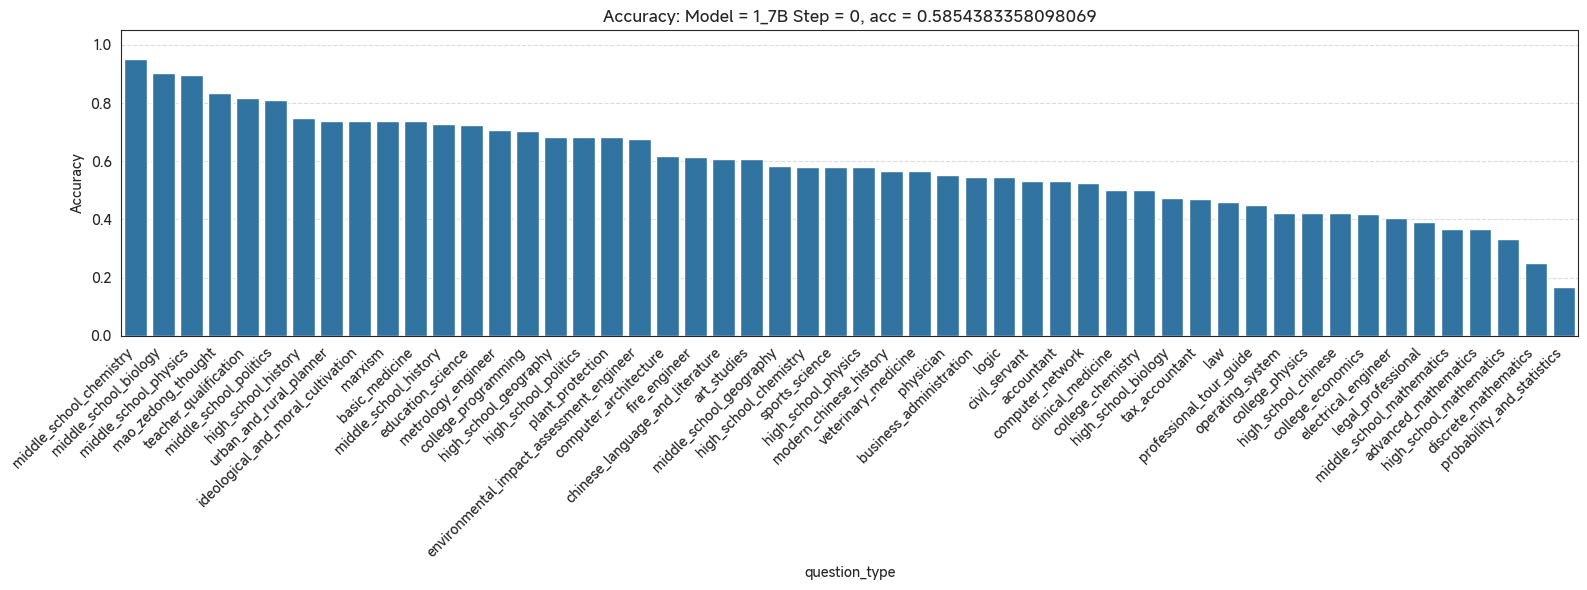

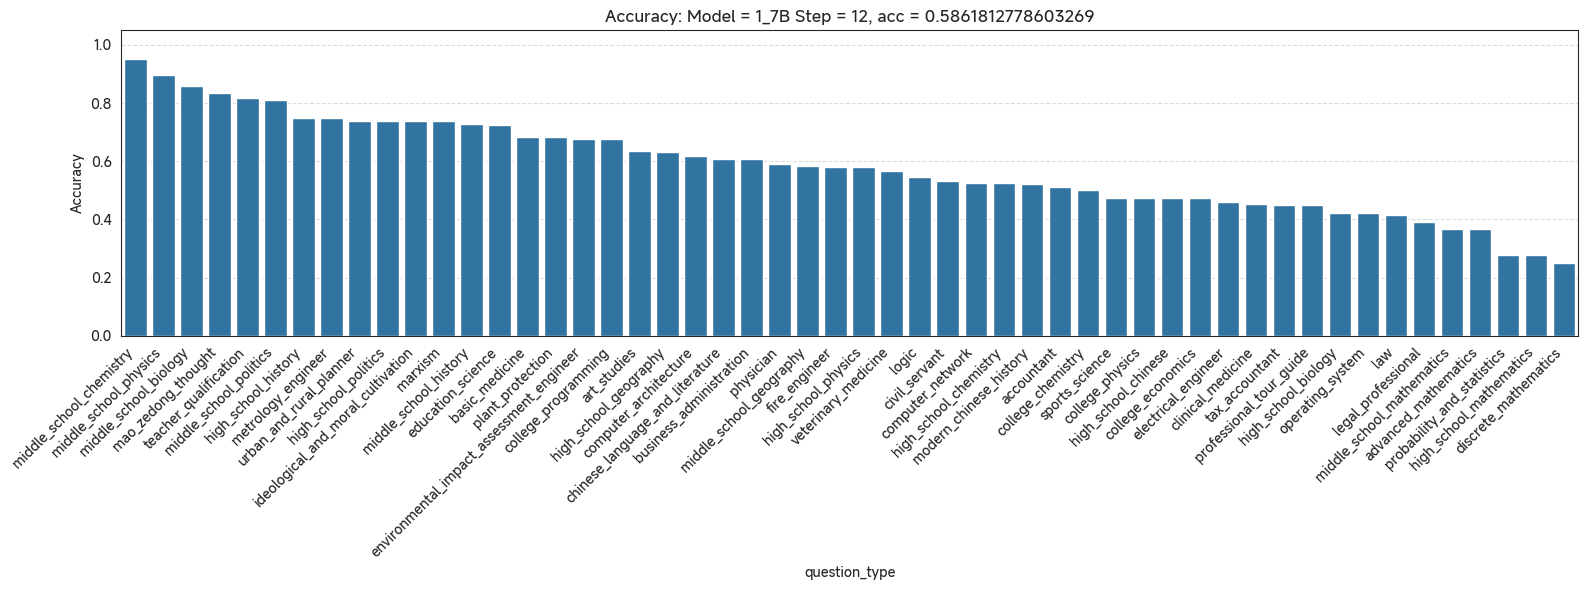

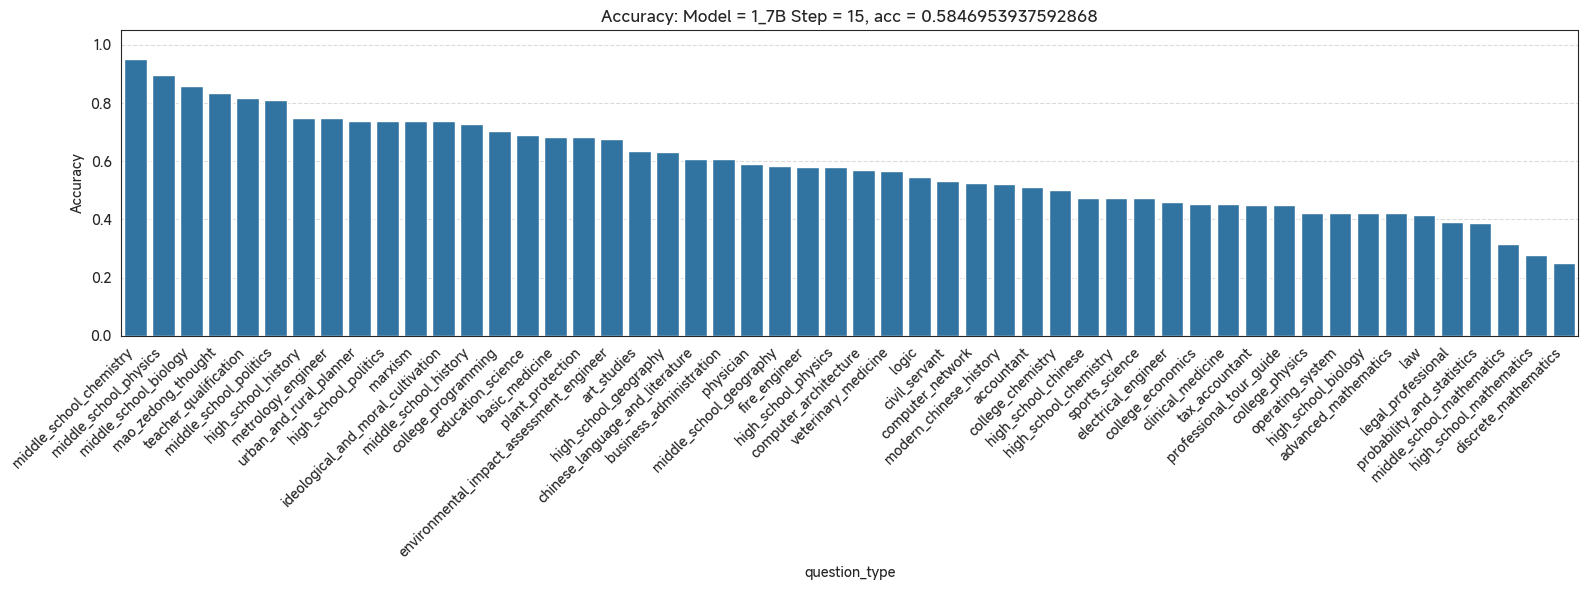

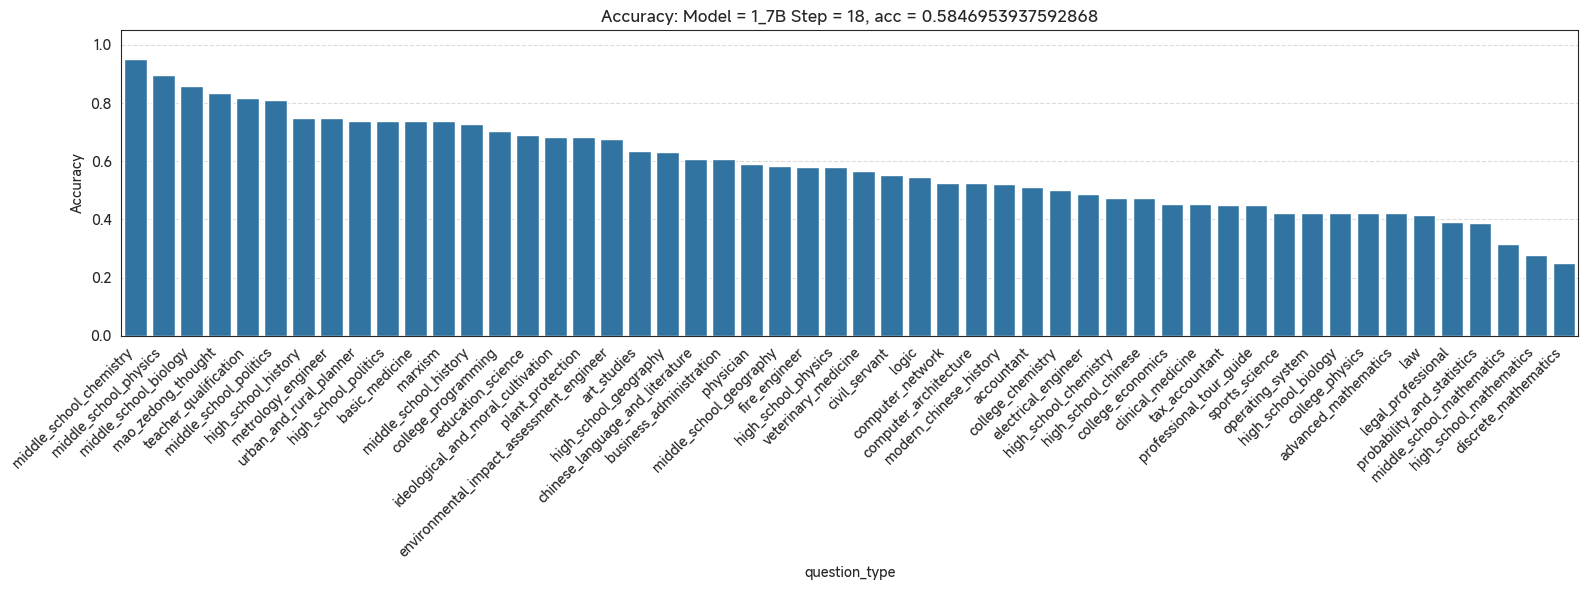

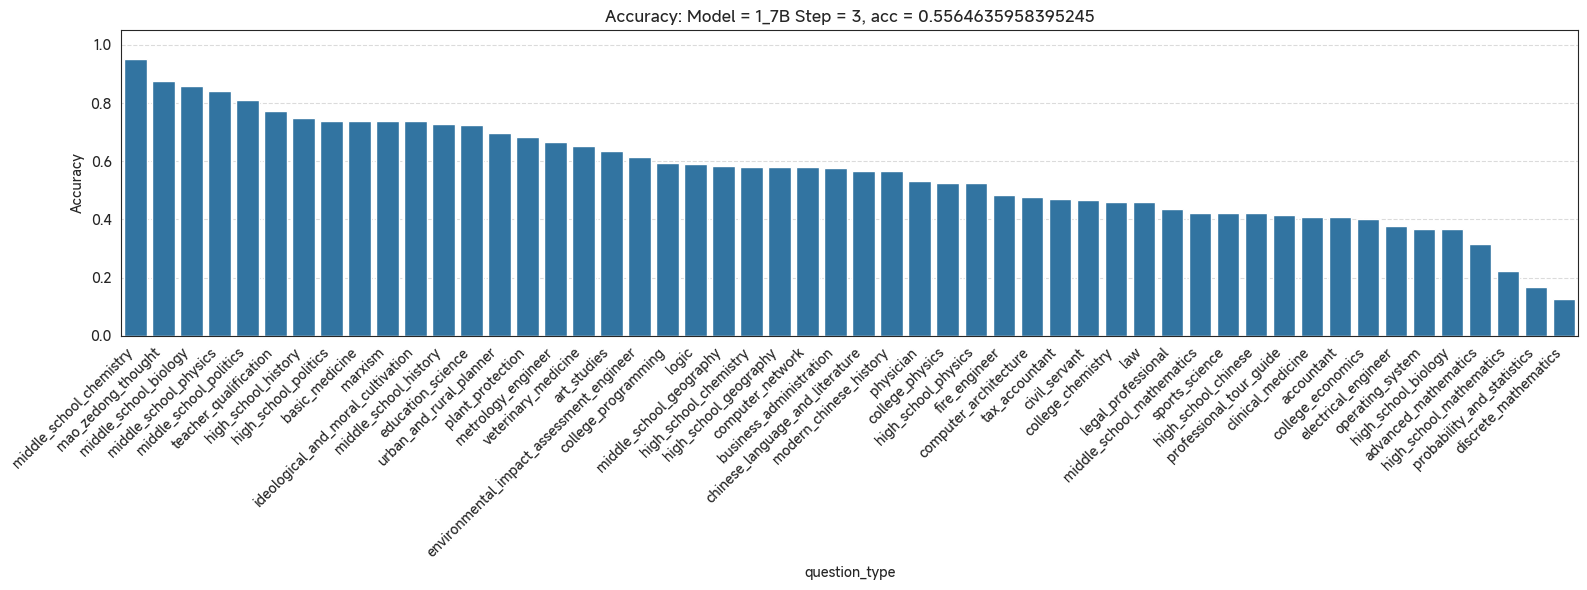

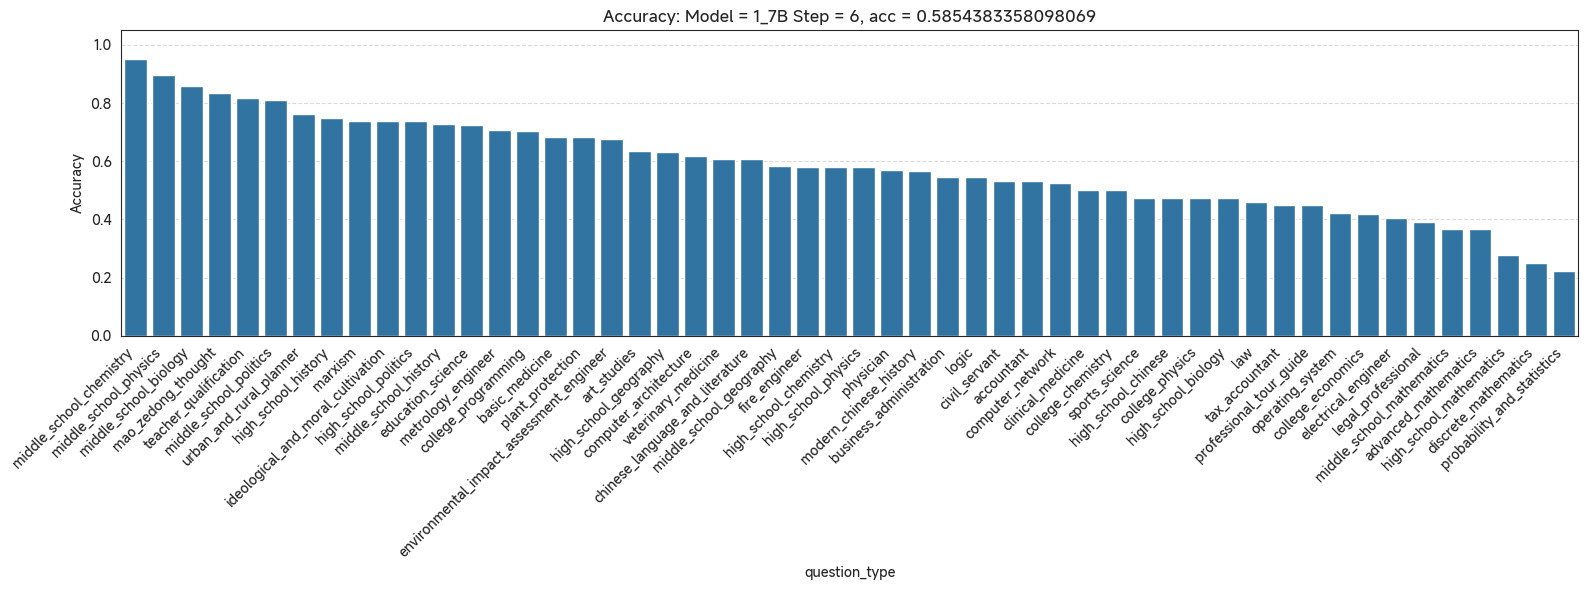

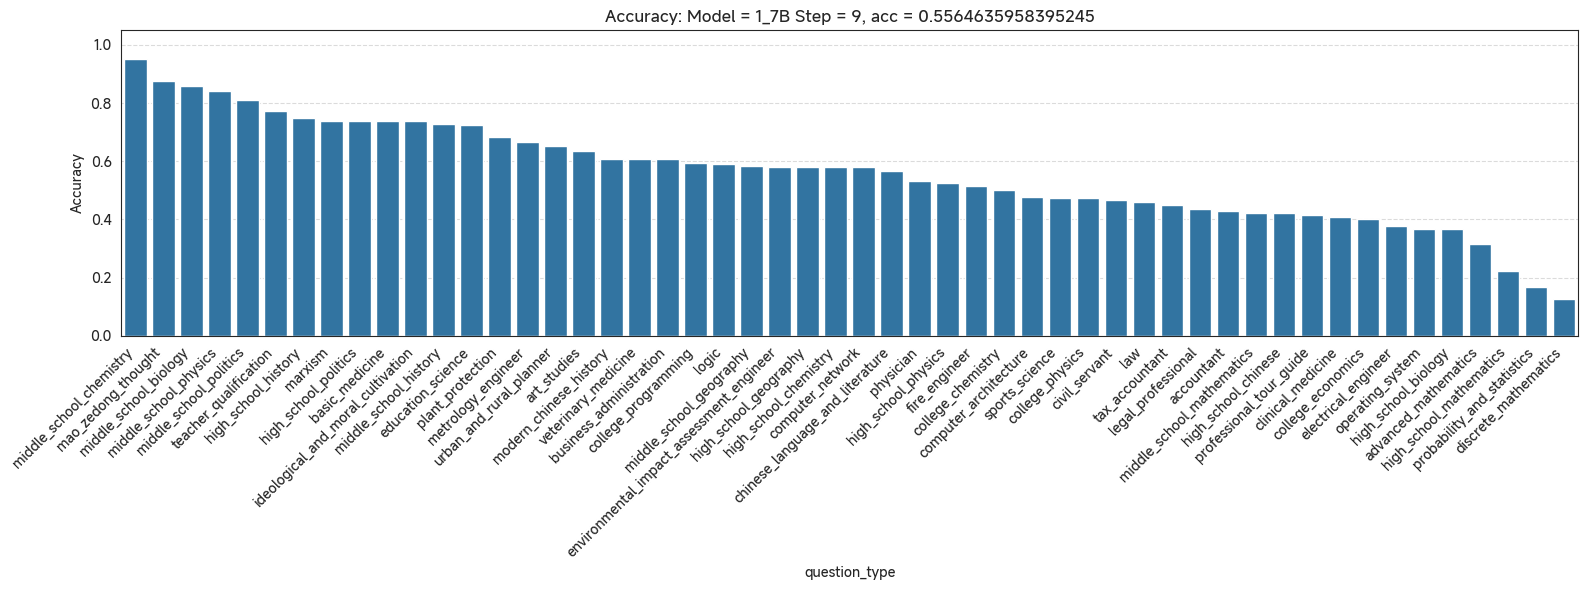

In [356]:
for df_path in file_list("./eval_result/1_7B"):
    # 示例调用
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path)
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    # 分组统计正确率
    acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
    acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
    acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
    acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

    acc_all = df['is_correct'].sum() / len(df)
    
    # 可视化
    plt.figure(figsize=(16, 6))
    sns.barplot(x="question_type", y="accuracy", data=acc_df)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    acc_df

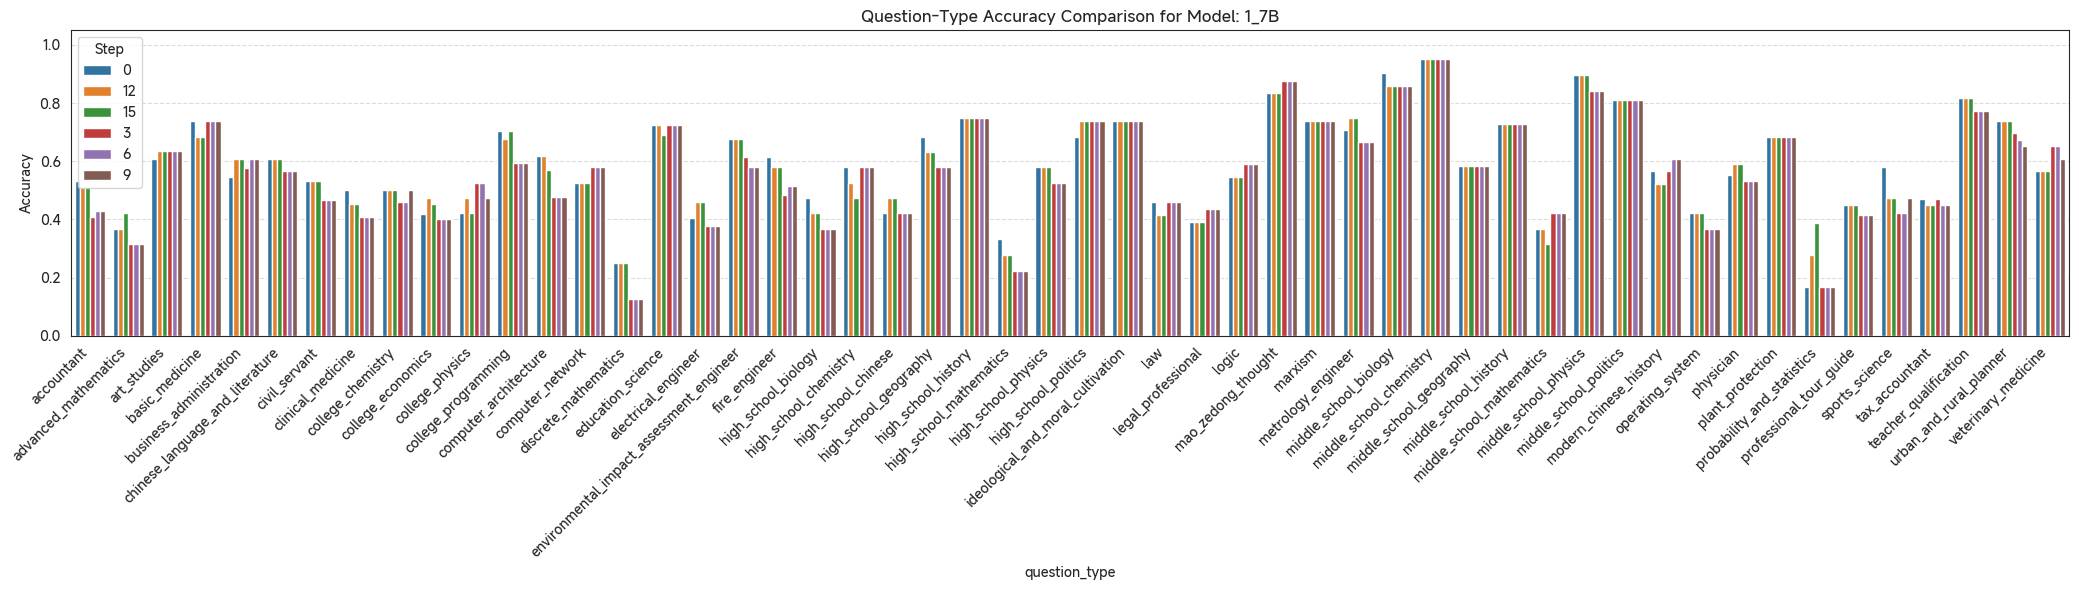

In [345]:
# 🔄 收集所有数据
records = []

for df_path in file_list("./eval_result/1_7B"):
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path)
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
    acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
    acc_df = acc_df.reset_index()

    acc_df["model"] = model
    acc_df["step"] = step

    records.append(acc_df)

# 📊 合并所有 step 的准确率数据
all_acc_df = pd.concat(records, ignore_index=True)

# ✅ 在同一张图上绘制
plt.figure(figsize=(21, 6))
sns.barplot(
    data=all_acc_df,
    x="question_type", y="accuracy", hue="step"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Question-Type Accuracy Comparison for Model: {model}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Step")
plt.tight_layout()
plt.show()

模型名: 1_7B
Step: 0


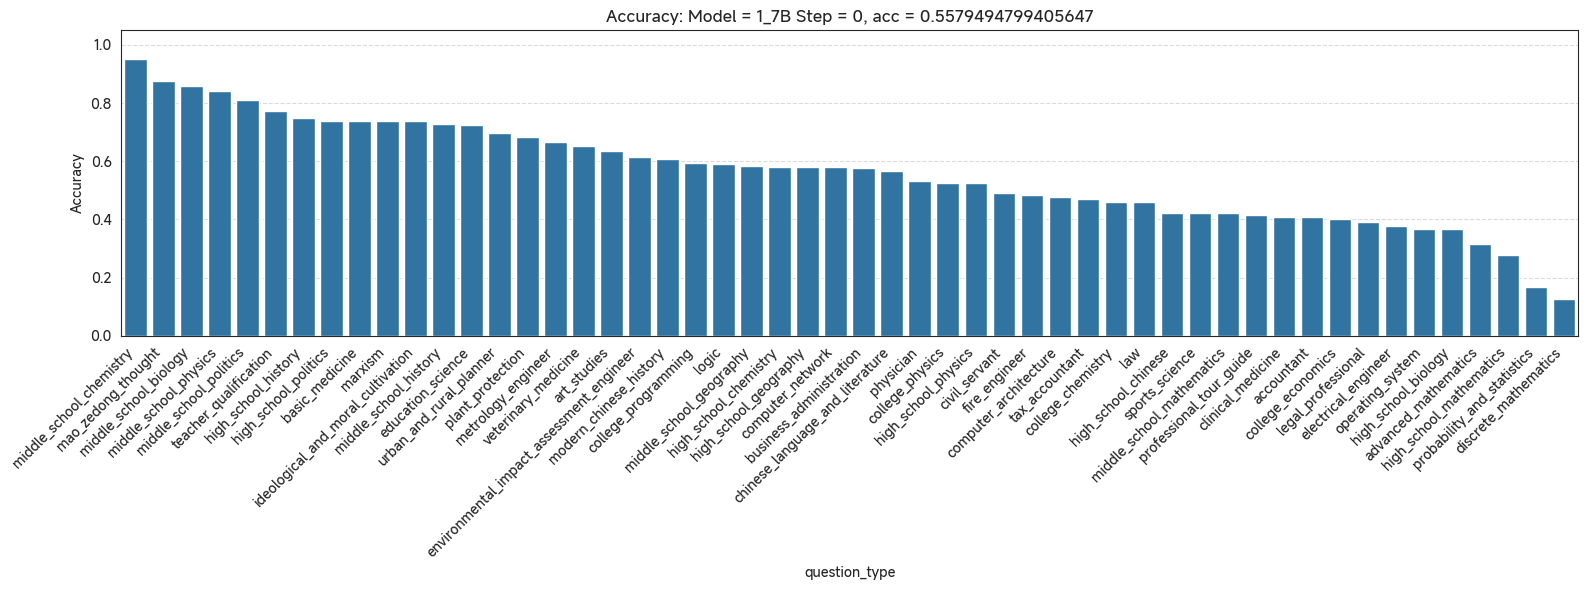

0.5579494799405647


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                         mao_zedong_thought               24   
2                      middle_school_biology               21   
3                      middle_school_physics               19   
4                     middle_school_politics               21   
5                      teacher_qualification               44   
6                        high_school_history               20   
7                       high_school_politics               19   
8                             basic_medicine               19   
9                                    marxism               19   
10         ideological_and_moral_cultivation               19   
11                     middle_school_history               22   
12                         education_science               29   
13                   urban_and_rural_planner               46   
14                          plant_protection               22   
15                        metrology_engineer               24   
16                       veterinary_medicine               23   
17                               art_studies               33   
18  environmental_impact_assessment_engineer               31   
19                    modern_chinese_history               23   
20                       college_programming               37   
21                                     logic               22   
22                   middle_school_geography               12   
23                     high_school_chemistry               19   
24                     high_school_geography               19   
25                          computer_network               19   
26                   business_administration               33   
27           chinese_language_and_literature               23   
28                                 physician               49   
29                           college_physics               19   
30                       high_school_physics               19   
31                             civil_servant               47   
32                             fire_engineer               31   
33                     computer_architecture               21   
34                            tax_accountant               49   
35                         college_chemistry               24   
36                                       law               24   
37                       high_school_chinese               19   
38                            sports_science               19   
39                 middle_school_mathematics               19   
40                   professional_tour_guide               29   
41                         clinical_medicine               22   
42                                accountant               49   
43                         college_economics               55   
44                        legal_professional               23   
45                       electrical_engineer               37   
46                          operating_system               19   
47                       high_school_biology               19   
48                      advanced_mathematics               19   
49                   high_school_mathematics               18   
50                probability_and_statistics               18   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                19  0.950000  
1                21  0.875000  
2                18  0.857143  
3                16  0.842105  
4                17  0.809524  
5                34  0.772727  
6                15  0.750000  
7                14  0.736842  
8                14  0.736842  
9                14  0.736842  
10               14  0.736842  
11               16  0.727273  
12               21  0.724138  
13               32  0.695652  
14               15  0.681818  
15               16  0.666667  
16               15  0.652174  
17       

In [135]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_0.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B_3
Step: 0


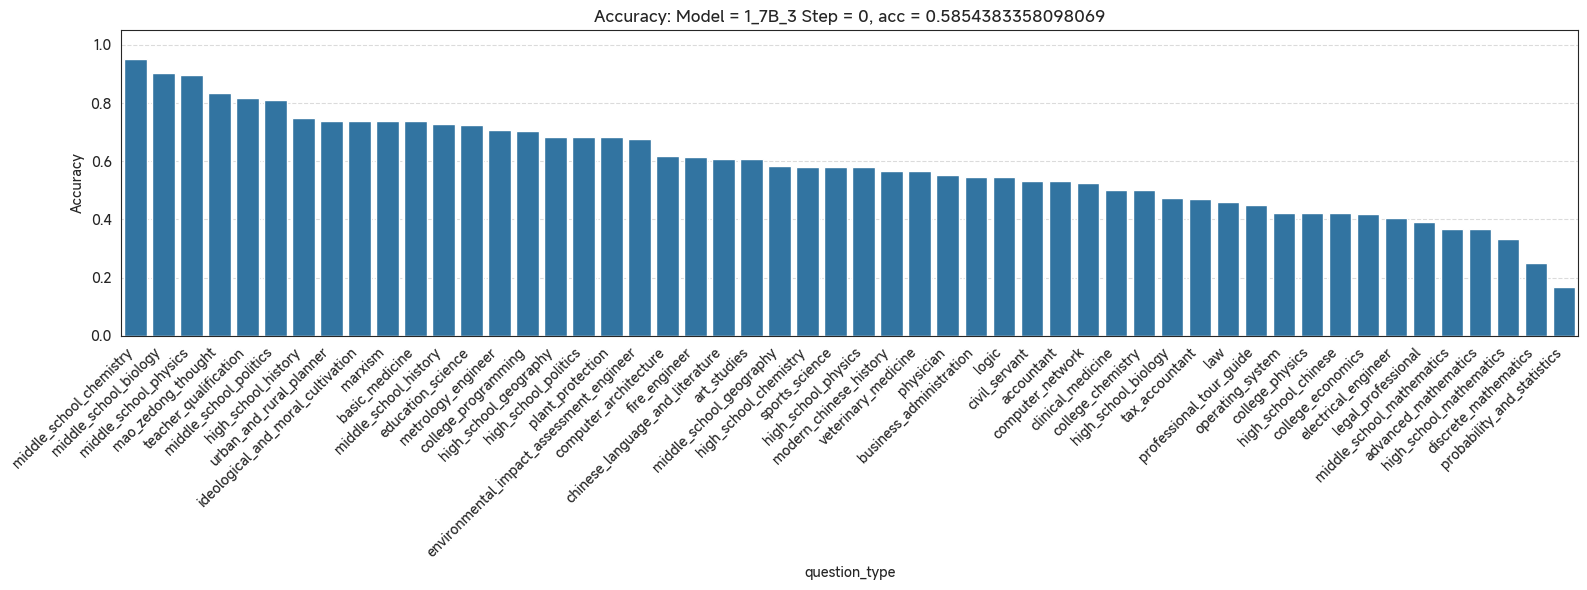

0.5854383358098069


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                      middle_school_biology               21   
2                      middle_school_physics               19   
3                         mao_zedong_thought               24   
4                      teacher_qualification               44   
5                     middle_school_politics               21   
6                        high_school_history               20   
7                    urban_and_rural_planner               46   
8          ideological_and_moral_cultivation               19   
9                                    marxism               19   
10                            basic_medicine               19   
11                     middle_school_history               22   
12                         education_science               29   
13                        metrology_engineer               24   
14                       college_programming               37   
15                     high_school_geography               19   
16                      high_school_politics               19   
17                          plant_protection               22   
18  environmental_impact_assessment_engineer               31   
19                     computer_architecture               21   
20                             fire_engineer               31   
21           chinese_language_and_literature               23   
22                               art_studies               33   
23                   middle_school_geography               12   
24                     high_school_chemistry               19   
25                            sports_science               19   
26                       high_school_physics               19   
27                    modern_chinese_history               23   
28                       veterinary_medicine               23   
29                                 physician               49   
30                   business_administration               33   
31                                     logic               22   
32                             civil_servant               47   
33                                accountant               49   
34                          computer_network               19   
35                         clinical_medicine               22   
36                         college_chemistry               24   
37                       high_school_biology               19   
38                            tax_accountant               49   
39                                       law               24   
40                   professional_tour_guide               29   
41                          operating_system               19   
42                           college_physics               19   
43                       high_school_chinese               19   
44                         college_economics               55   
45                       electrical_engineer               37   
46                        legal_professional               23   
47                 middle_school_mathematics               19   
48                      advanced_mathematics               19   
49                   high_school_mathematics               18   
50                      discrete_mathematics               16   
51                probability_and_statistics               18   

    correct_answers  accuracy  
0                19  0.950000  
1                19  0.904762  
2                17  0.894737  
3                20  0.833333  
4                36  0.818182  
5                17  0.809524  
6                15  0.750000  
7                34  0.739130  
8                14  0.736842  
9                14  0.736842  
10               14  0.736842  
11               16  0.727273  
12               21  0.724138  
13               17  0.708333  
14               26  0.702703  
15               13  0.684211  
16               13  0.684211  
17       

In [357]:
# 读取数据

df_path = "./eval_result/1_7B_3/answer_step_0.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B
Step: 3


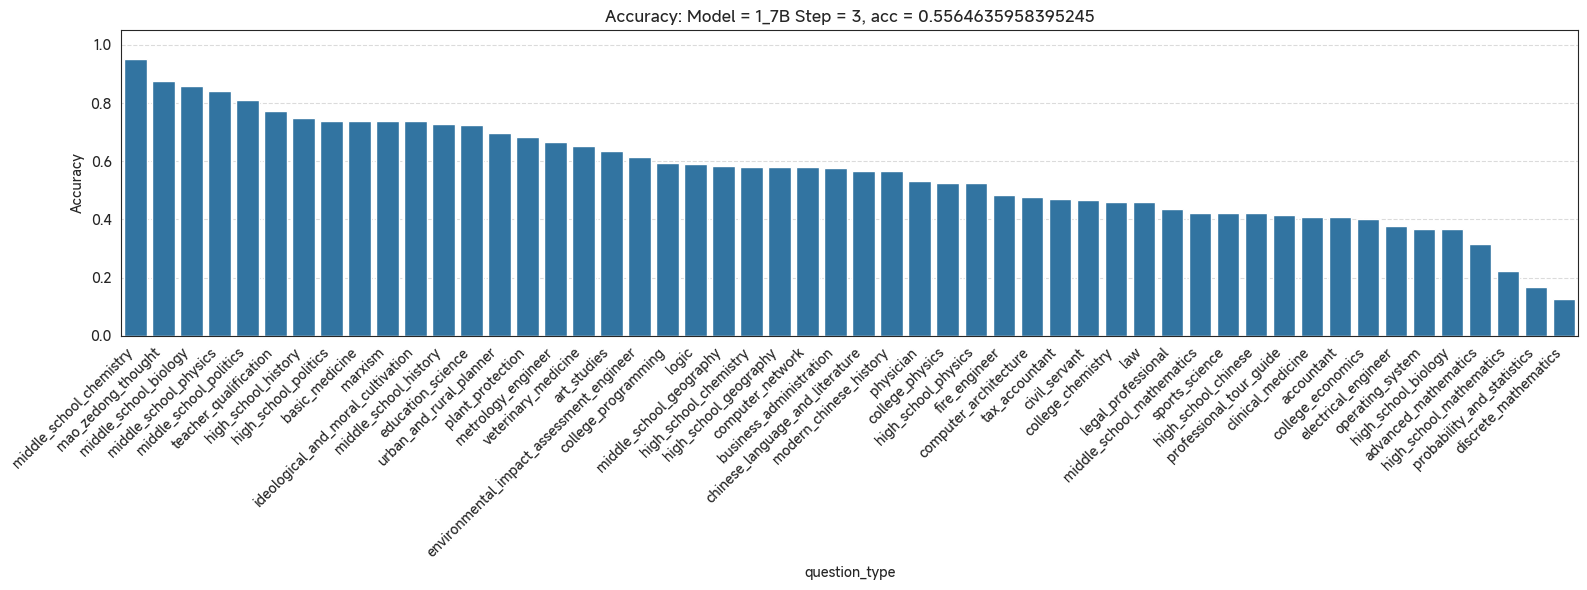

0.5564635958395245


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                         mao_zedong_thought               24   
2                      middle_school_biology               21   
3                      middle_school_physics               19   
4                     middle_school_politics               21   
5                      teacher_qualification               44   
6                        high_school_history               20   
7                       high_school_politics               19   
8                             basic_medicine               19   
9                                    marxism               19   
10         ideological_and_moral_cultivation               19   
11                     middle_school_history               22   
12                         education_science               29   
13                   urban_and_rural_planner               46   
14                          plant_protection               22   
15                        metrology_engineer               24   
16                       veterinary_medicine               23   
17                               art_studies               33   
18  environmental_impact_assessment_engineer               31   
19                       college_programming               37   
20                                     logic               22   
21                   middle_school_geography               12   
22                     high_school_chemistry               19   
23                     high_school_geography               19   
24                          computer_network               19   
25                   business_administration               33   
26           chinese_language_and_literature               23   
27                    modern_chinese_history               23   
28                                 physician               49   
29                           college_physics               19   
30                       high_school_physics               19   
31                             fire_engineer               31   
32                     computer_architecture               21   
33                            tax_accountant               49   
34                             civil_servant               47   
35                         college_chemistry               24   
36                                       law               24   
37                        legal_professional               23   
38                 middle_school_mathematics               19   
39                            sports_science               19   
40                       high_school_chinese               19   
41                   professional_tour_guide               29   
42                         clinical_medicine               22   
43                                accountant               49   
44                         college_economics               55   
45                       electrical_engineer               37   
46                          operating_system               19   
47                       high_school_biology               19   
48                      advanced_mathematics               19   
49                   high_school_mathematics               18   
50                probability_and_statistics               18   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                19  0.950000  
1                21  0.875000  
2                18  0.857143  
3                16  0.842105  
4                17  0.809524  
5                34  0.772727  
6                15  0.750000  
7                14  0.736842  
8                14  0.736842  
9                14  0.736842  
10               14  0.736842  
11               16  0.727273  
12               21  0.724138  
13               32  0.695652  
14               15  0.681818  
15               16  0.666667  
16               15  0.652174  
17       

In [116]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_3.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B
Step: 6


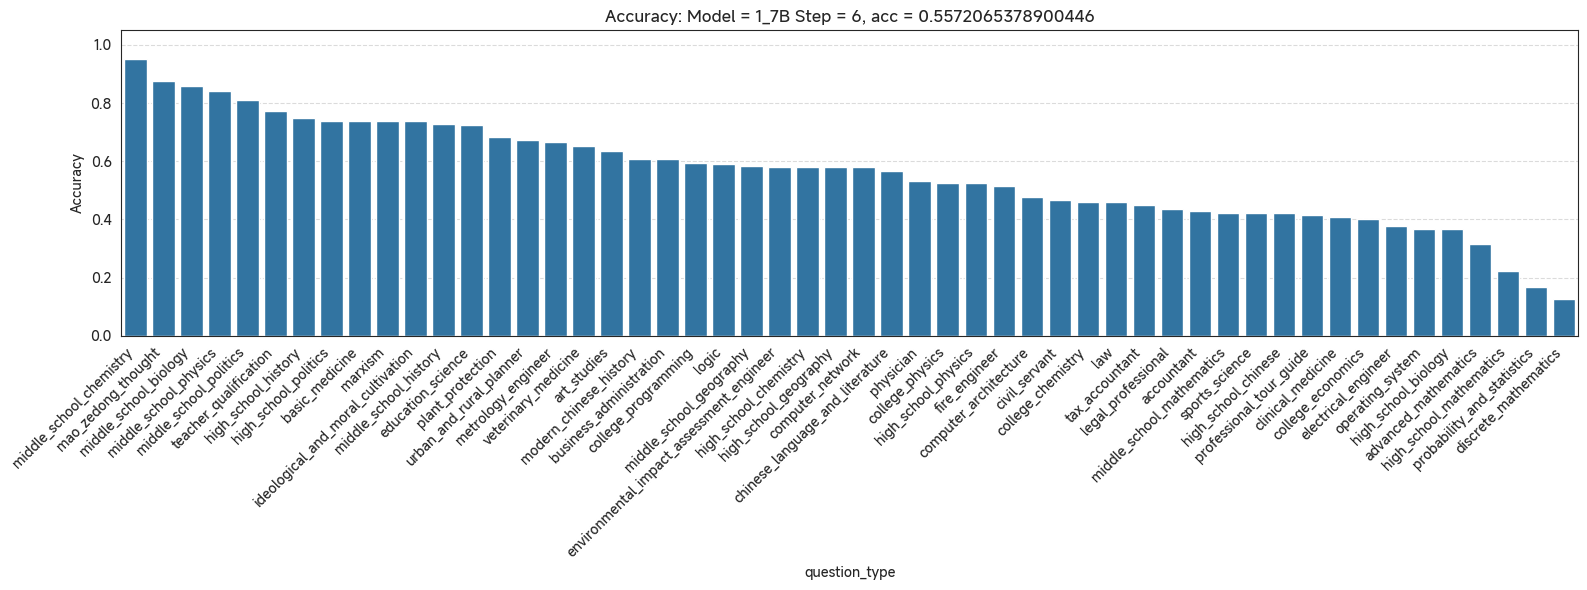

0.5572065378900446


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                         mao_zedong_thought               24   
2                      middle_school_biology               21   
3                      middle_school_physics               19   
4                     middle_school_politics               21   
5                      teacher_qualification               44   
6                        high_school_history               20   
7                       high_school_politics               19   
8                             basic_medicine               19   
9                                    marxism               19   
10         ideological_and_moral_cultivation               19   
11                     middle_school_history               22   
12                         education_science               29   
13                          plant_protection               22   
14                   urban_and_rural_planner               46   
15                        metrology_engineer               24   
16                       veterinary_medicine               23   
17                               art_studies               33   
18                    modern_chinese_history               23   
19                   business_administration               33   
20                       college_programming               37   
21                                     logic               22   
22                   middle_school_geography               12   
23  environmental_impact_assessment_engineer               31   
24                     high_school_chemistry               19   
25                     high_school_geography               19   
26                          computer_network               19   
27           chinese_language_and_literature               23   
28                                 physician               49   
29                           college_physics               19   
30                       high_school_physics               19   
31                             fire_engineer               31   
32                     computer_architecture               21   
33                             civil_servant               47   
34                         college_chemistry               24   
35                                       law               24   
36                            tax_accountant               49   
37                        legal_professional               23   
38                                accountant               49   
39                 middle_school_mathematics               19   
40                            sports_science               19   
41                       high_school_chinese               19   
42                   professional_tour_guide               29   
43                         clinical_medicine               22   
44                         college_economics               55   
45                       electrical_engineer               37   
46                          operating_system               19   
47                       high_school_biology               19   
48                      advanced_mathematics               19   
49                   high_school_mathematics               18   
50                probability_and_statistics               18   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                19  0.950000  
1                21  0.875000  
2                18  0.857143  
3                16  0.842105  
4                17  0.809524  
5                34  0.772727  
6                15  0.750000  
7                14  0.736842  
8                14  0.736842  
9                14  0.736842  
10               14  0.736842  
11               16  0.727273  
12               21  0.724138  
13               15  0.681818  
14               31  0.673913  
15               16  0.666667  
16               15  0.652174  
17       

In [230]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_6.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B
Step: 9


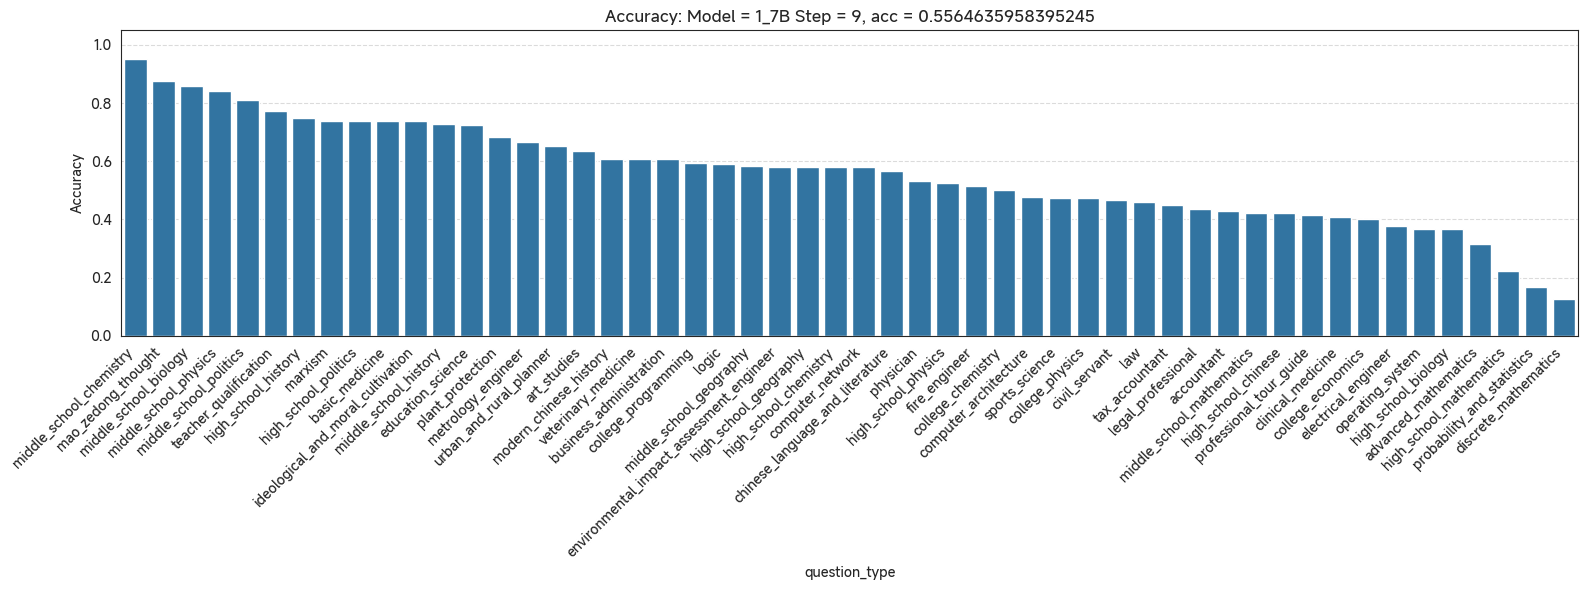

0.5564635958395245


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                         mao_zedong_thought               24   
2                      middle_school_biology               21   
3                      middle_school_physics               19   
4                     middle_school_politics               21   
5                      teacher_qualification               44   
6                        high_school_history               20   
7                                    marxism               19   
8                       high_school_politics               19   
9                             basic_medicine               19   
10         ideological_and_moral_cultivation               19   
11                     middle_school_history               22   
12                         education_science               29   
13                          plant_protection               22   
14                        metrology_engineer               24   
15                   urban_and_rural_planner               46   
16                               art_studies               33   
17                    modern_chinese_history               23   
18                       veterinary_medicine               23   
19                   business_administration               33   
20                       college_programming               37   
21                                     logic               22   
22                   middle_school_geography               12   
23  environmental_impact_assessment_engineer               31   
24                     high_school_geography               19   
25                     high_school_chemistry               19   
26                          computer_network               19   
27           chinese_language_and_literature               23   
28                                 physician               49   
29                       high_school_physics               19   
30                             fire_engineer               31   
31                         college_chemistry               24   
32                     computer_architecture               21   
33                            sports_science               19   
34                           college_physics               19   
35                             civil_servant               47   
36                                       law               24   
37                            tax_accountant               49   
38                        legal_professional               23   
39                                accountant               49   
40                 middle_school_mathematics               19   
41                       high_school_chinese               19   
42                   professional_tour_guide               29   
43                         clinical_medicine               22   
44                         college_economics               55   
45                       electrical_engineer               37   
46                          operating_system               19   
47                       high_school_biology               19   
48                      advanced_mathematics               19   
49                   high_school_mathematics               18   
50                probability_and_statistics               18   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                19  0.950000  
1                21  0.875000  
2                18  0.857143  
3                16  0.842105  
4                17  0.809524  
5                34  0.772727  
6                15  0.750000  
7                14  0.736842  
8                14  0.736842  
9                14  0.736842  
10               14  0.736842  
11               16  0.727273  
12               21  0.724138  
13               15  0.681818  
14               16  0.666667  
15               30  0.652174  
16               21  0.636364  
17       

In [312]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_9.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B
Step: 12


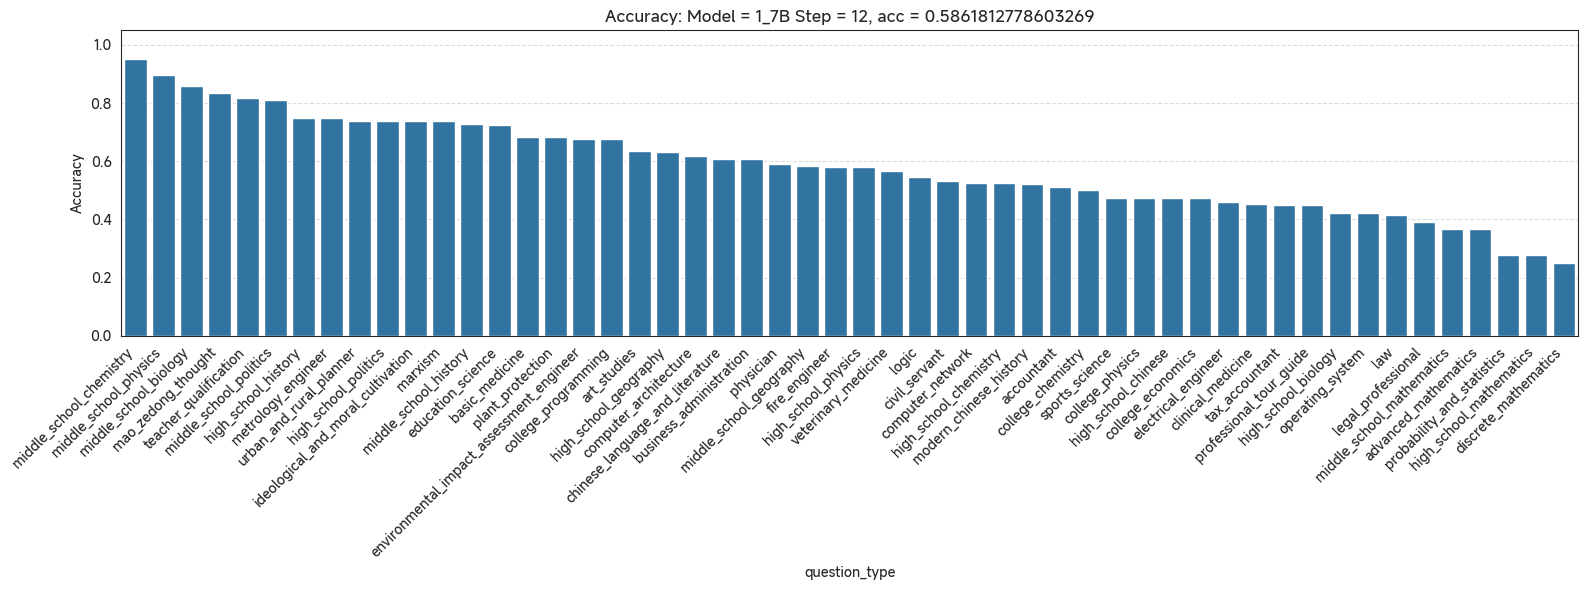

0.5861812778603269


question_type  total_questions  \
0                    middle_school_chemistry               20   
1                      middle_school_physics               19   
2                      middle_school_biology               21   
3                         mao_zedong_thought               24   
4                      teacher_qualification               44   
5                     middle_school_politics               21   
6                        high_school_history               20   
7                         metrology_engineer               24   
8                    urban_and_rural_planner               46   
9                       high_school_politics               19   
10         ideological_and_moral_cultivation               19   
11                                   marxism               19   
12                     middle_school_history               22   
13                         education_science               29   
14                            basic_medicine               19   
15                          plant_protection               22   
16  environmental_impact_assessment_engineer               31   
17                       college_programming               37   
18                               art_studies               33   
19                     high_school_geography               19   
20                     computer_architecture               21   
21           chinese_language_and_literature               23   
22                   business_administration               33   
23                                 physician               49   
24                   middle_school_geography               12   
25                             fire_engineer               31   
26                       high_school_physics               19   
27                       veterinary_medicine               23   
28                                     logic               22   
29                             civil_servant               47   
30                          computer_network               19   
31                     high_school_chemistry               19   
32                    modern_chinese_history               23   
33                                accountant               49   
34                         college_chemistry               24   
35                            sports_science               19   
36                           college_physics               19   
37                       high_school_chinese               19   
38                         college_economics               55   
39                       electrical_engineer               37   
40                         clinical_medicine               22   
41                            tax_accountant               49   
42                   professional_tour_guide               29   
43                       high_school_biology               19   
44                          operating_system               19   
45                                       law               24   
46                        legal_professional               23   
47                 middle_school_mathematics               19   
48                      advanced_mathematics               19   
49                probability_and_statistics               18   
50                   high_school_mathematics               18   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                19  0.950000  
1                17  0.894737  
2                18  0.857143  
3                20  0.833333  
4                36  0.818182  
5                17  0.809524  
6                15  0.750000  
7                18  0.750000  
8                34  0.739130  
9                14  0.736842  
10               14  0.736842  
11               14  0.736842  
12               16  0.727273  
13               21  0.724138  
14               13  0.684211  
15               15  0.681818  
16               21  0.677419  
17       

In [313]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_12.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

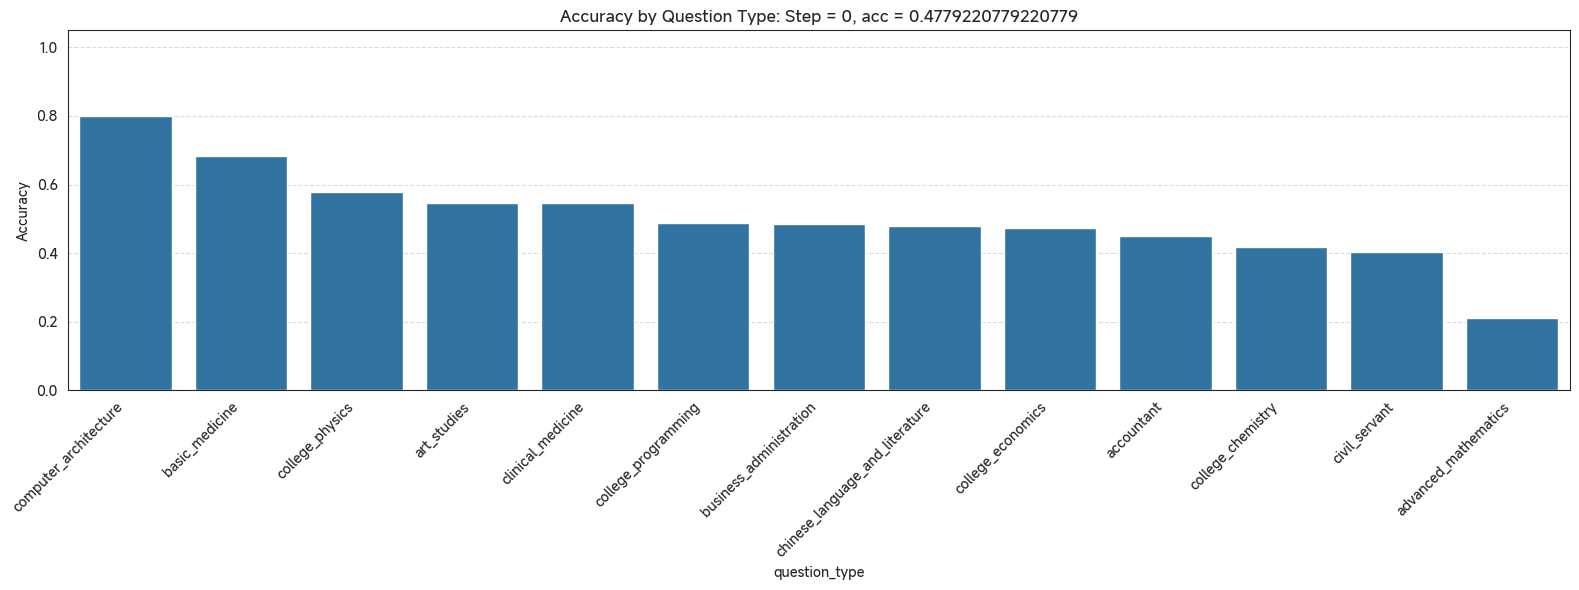

question_type  total_questions  correct_answers  \
0             computer_architecture                5                4   
1                    basic_medicine               19               13   
2                   college_physics               19               11   
3                       art_studies               33               18   
4                 clinical_medicine               22               12   
5               college_programming               37               18   
6           business_administration               33               16   
7   chinese_language_and_literature               23               11   
8                 college_economics               55               26   
9                        accountant               49               22   
10                college_chemistry               24               10   
11                    civil_servant               47               19   
12             advanced_mathematics               19                4   

    accuracy  
0   0.800000  
1   0.684211  
2   0.578947  
3   0.545455  
4   0.545455  
5   0.486486  
6   0.484848  
7   0.478261  
8   0.472727  
9   0.448980  
10  0.416667  
11  0.404255  
12  0.210526

In [168]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_0.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 0, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

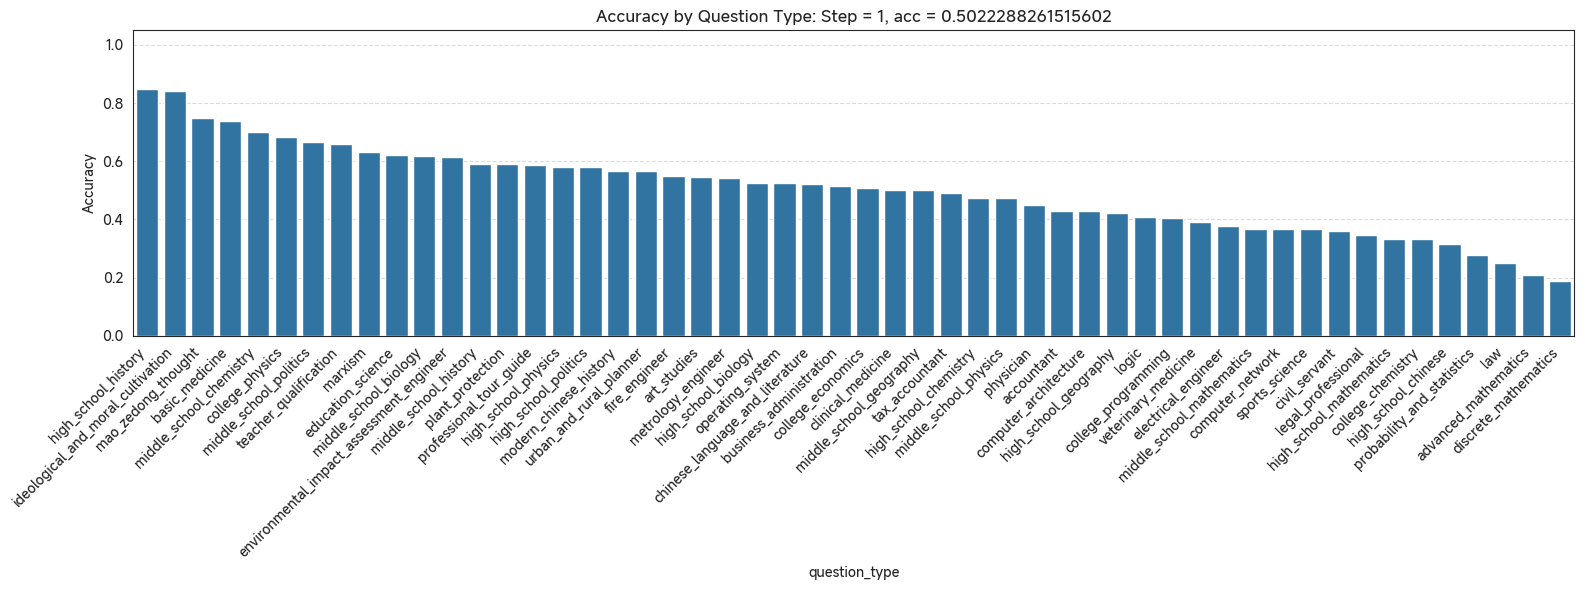

question_type  total_questions  \
0                        high_school_history               20   
1          ideological_and_moral_cultivation               19   
2                         mao_zedong_thought               24   
3                             basic_medicine               19   
4                    middle_school_chemistry               20   
5                            college_physics               19   
6                     middle_school_politics               21   
7                      teacher_qualification               44   
8                                    marxism               19   
9                          education_science               29   
10                     middle_school_biology               21   
11  environmental_impact_assessment_engineer               31   
12                     middle_school_history               22   
13                          plant_protection               22   
14                   professional_tour_guide               29   
15                       high_school_physics               19   
16                      high_school_politics               19   
17                    modern_chinese_history               23   
18                   urban_and_rural_planner               46   
19                             fire_engineer               31   
20                               art_studies               33   
21                        metrology_engineer               24   
22                       high_school_biology               19   
23                          operating_system               19   
24           chinese_language_and_literature               23   
25                   business_administration               33   
26                         college_economics               55   
27                         clinical_medicine               22   
28                   middle_school_geography               12   
29                            tax_accountant               49   
30                     high_school_chemistry               19   
31                     middle_school_physics               19   
32                                 physician               49   
33                                accountant               49   
34                     computer_architecture               21   
35                     high_school_geography               19   
36                                     logic               22   
37                       college_programming               37   
38                       veterinary_medicine               23   
39                       electrical_engineer               37   
40                 middle_school_mathematics               19   
41                          computer_network               19   
42                            sports_science               19   
43                             civil_servant               47   
44                        legal_professional               23   
45                   high_school_mathematics               18   
46                         college_chemistry               24   
47                       high_school_chinese               19   
48                probability_and_statistics               18   
49                                       law               24   
50                      advanced_mathematics               19   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                17  0.850000  
1                16  0.842105  
2                18  0.750000  
3                14  0.736842  
4                14  0.700000  
5                13  0.684211  
6                14  0.666667  
7                29  0.659091  
8                12  0.631579  
9                18  0.620690  
10               13  0.619048  
11               19  0.612903  
12               13  0.590909  
13               13  0.590909  
14               17  0.586207  
15               11  0.578947  
16               11  0.578947  
17       

In [390]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_1.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 1, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df


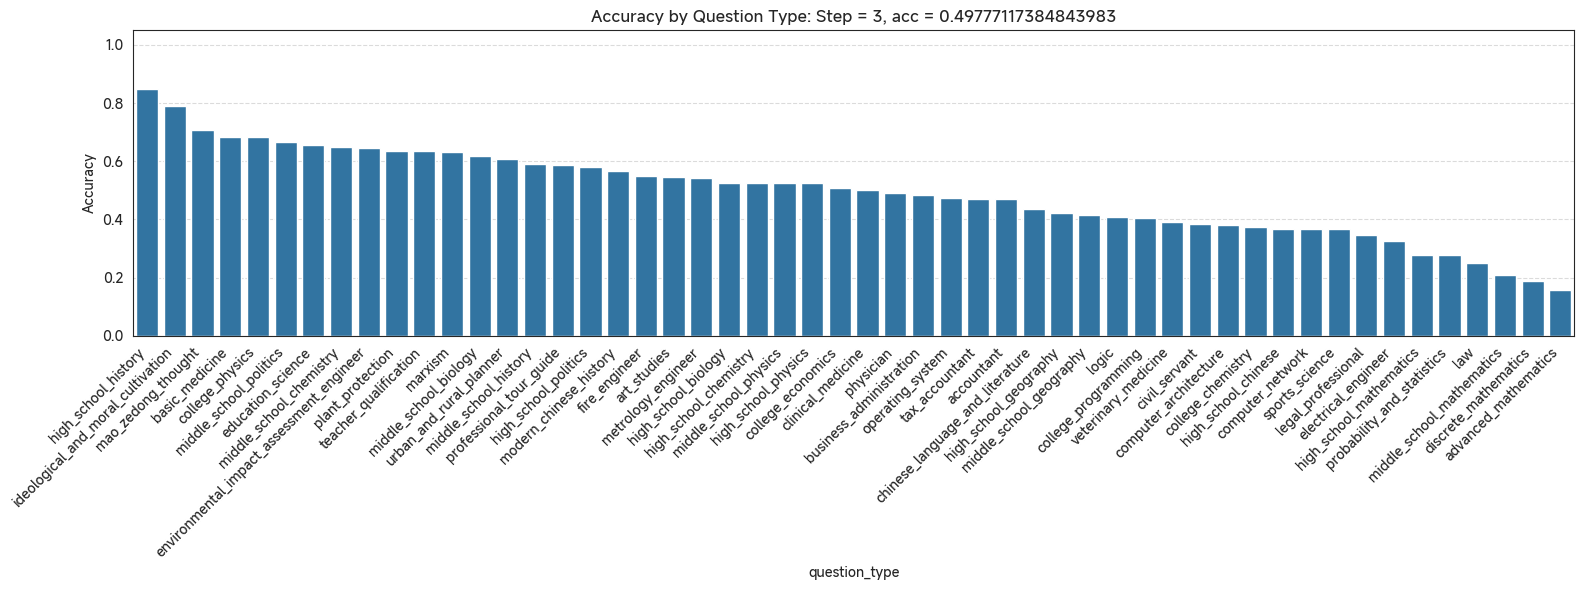

question_type  total_questions  \
0                        high_school_history               20   
1          ideological_and_moral_cultivation               19   
2                         mao_zedong_thought               24   
3                             basic_medicine               19   
4                            college_physics               19   
5                     middle_school_politics               21   
6                          education_science               29   
7                    middle_school_chemistry               20   
8   environmental_impact_assessment_engineer               31   
9                           plant_protection               22   
10                     teacher_qualification               44   
11                                   marxism               19   
12                     middle_school_biology               21   
13                   urban_and_rural_planner               46   
14                     middle_school_history               22   
15                   professional_tour_guide               29   
16                      high_school_politics               19   
17                    modern_chinese_history               23   
18                             fire_engineer               31   
19                               art_studies               33   
20                        metrology_engineer               24   
21                       high_school_biology               19   
22                     high_school_chemistry               19   
23                     middle_school_physics               19   
24                       high_school_physics               19   
25                         college_economics               55   
26                         clinical_medicine               22   
27                                 physician               49   
28                   business_administration               33   
29                          operating_system               19   
30                            tax_accountant               49   
31                                accountant               49   
32           chinese_language_and_literature               23   
33                     high_school_geography               19   
34                   middle_school_geography               12   
35                                     logic               22   
36                       college_programming               37   
37                       veterinary_medicine               23   
38                             civil_servant               47   
39                     computer_architecture               21   
40                         college_chemistry               24   
41                       high_school_chinese               19   
42                          computer_network               19   
43                            sports_science               19   
44                        legal_professional               23   
45                       electrical_engineer               37   
46                   high_school_mathematics               18   
47                probability_and_statistics               18   
48                                       law               24   
49                 middle_school_mathematics               19   
50                      discrete_mathematics               16   
51                      advanced_mathematics               19   

    correct_answers  accuracy  
0                17  0.850000  
1                15  0.789474  
2                17  0.708333  
3                13  0.684211  
4                13  0.684211  
5                14  0.666667  
6                19  0.655172  
7                13  0.650000  
8                20  0.645161  
9                14  0.636364  
10               28  0.636364  
11               12  0.631579  
12               13  0.619048  
13               28  0.608696  
14               13  0.590909  
15               17  0.586207  
16               11  0.578947  
17       

In [215]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_3.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

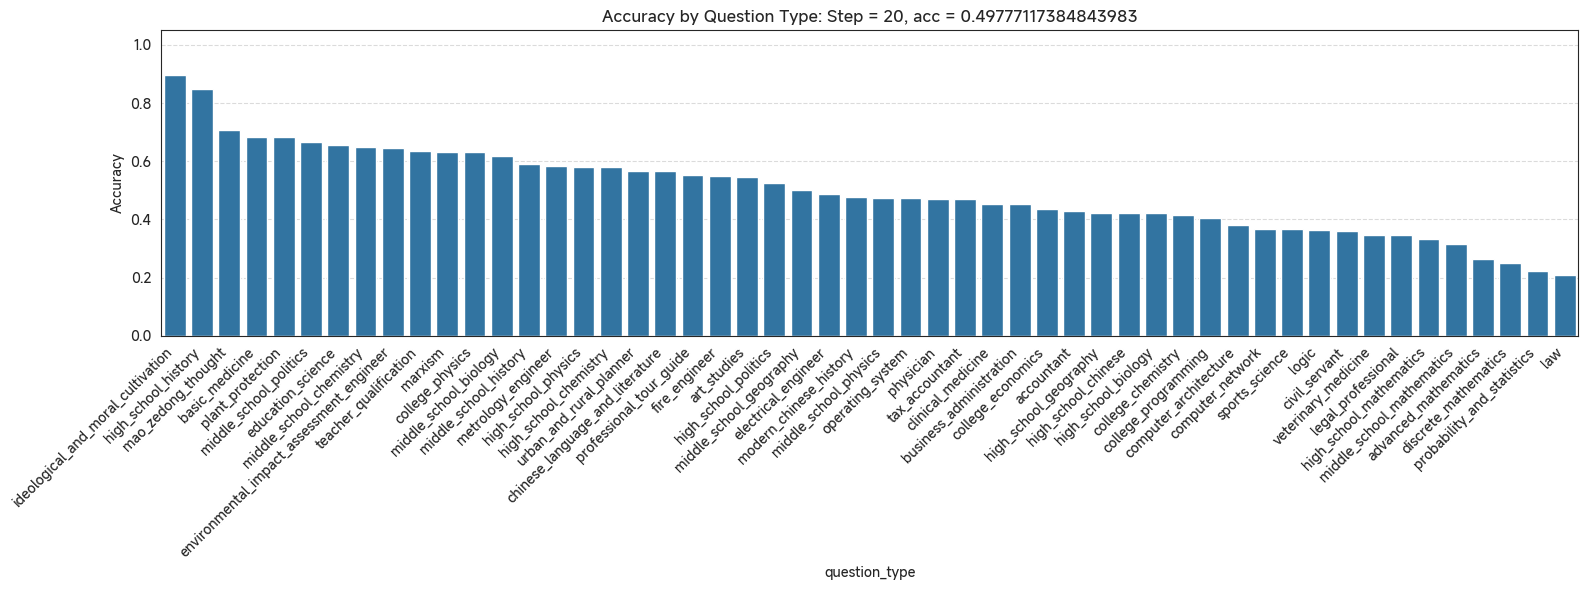

question_type  total_questions  \
0          ideological_and_moral_cultivation               19   
1                        high_school_history               20   
2                         mao_zedong_thought               24   
3                             basic_medicine               19   
4                           plant_protection               22   
5                     middle_school_politics               21   
6                          education_science               29   
7                    middle_school_chemistry               20   
8   environmental_impact_assessment_engineer               31   
9                      teacher_qualification               44   
10                                   marxism               19   
11                           college_physics               19   
12                     middle_school_biology               21   
13                     middle_school_history               22   
14                        metrology_engineer               24   
15                       high_school_physics               19   
16                     high_school_chemistry               19   
17                   urban_and_rural_planner               46   
18           chinese_language_and_literature               23   
19                   professional_tour_guide               29   
20                             fire_engineer               31   
21                               art_studies               33   
22                      high_school_politics               19   
23                   middle_school_geography               12   
24                       electrical_engineer               37   
25                    modern_chinese_history               23   
26                     middle_school_physics               19   
27                          operating_system               19   
28                                 physician               49   
29                            tax_accountant               49   
30                         clinical_medicine               22   
31                   business_administration               33   
32                         college_economics               55   
33                                accountant               49   
34                     high_school_geography               19   
35                       high_school_chinese               19   
36                       high_school_biology               19   
37                         college_chemistry               24   
38                       college_programming               37   
39                     computer_architecture               21   
40                          computer_network               19   
41                            sports_science               19   
42                                     logic               22   
43                             civil_servant               47   
44                       veterinary_medicine               23   
45                        legal_professional               23   
46                   high_school_mathematics               18   
47                 middle_school_mathematics               19   
48                      advanced_mathematics               19   
49                      discrete_mathematics               16   
50                probability_and_statistics               18   
51                                       law               24   

    correct_answers  accuracy  
0                17  0.894737  
1                17  0.850000  
2                17  0.708333  
3                13  0.684211  
4                15  0.681818  
5                14  0.666667  
6                19  0.655172  
7                13  0.650000  
8                20  0.645161  
9                28  0.636364  
10               12  0.631579  
11               12  0.631579  
12               13  0.619048  
13               13  0.590909  
14               14  0.583333  
15               11  0.578947  
16               11  0.578947  
17       

In [214]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

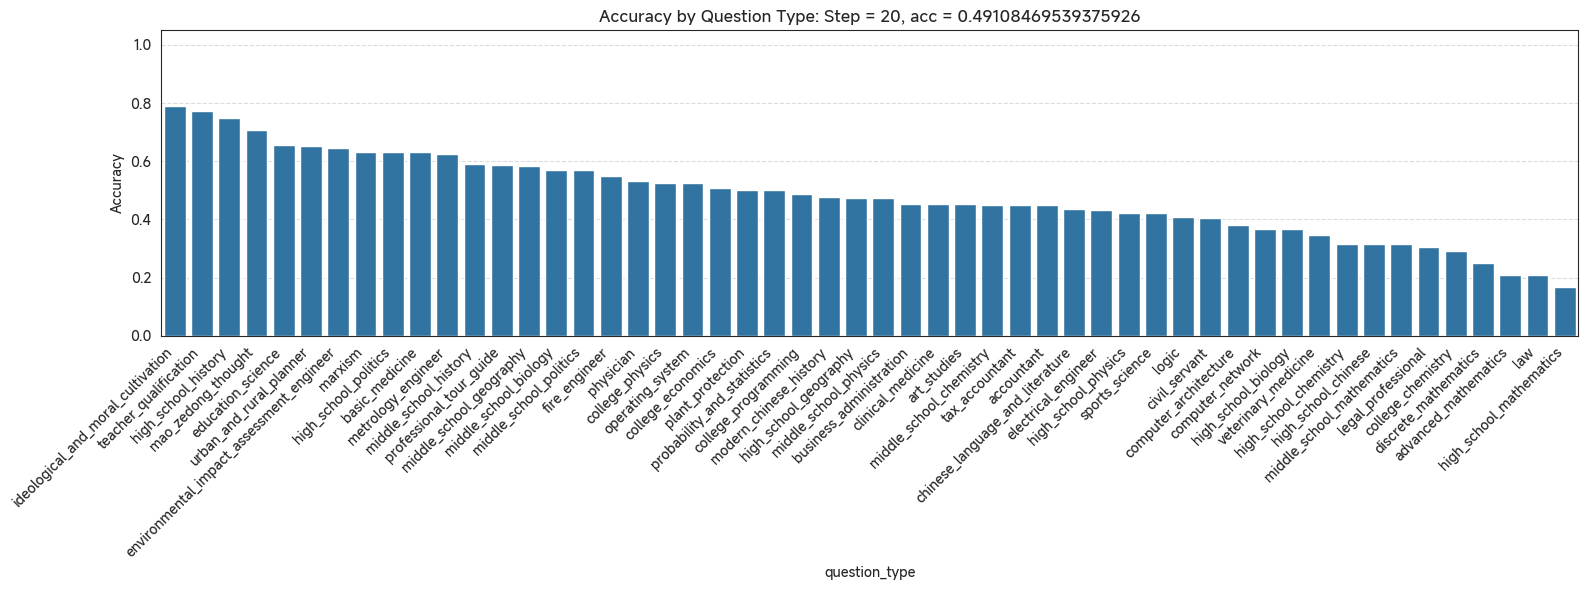

question_type  total_questions  \
0          ideological_and_moral_cultivation               19   
1                      teacher_qualification               44   
2                        high_school_history               20   
3                         mao_zedong_thought               24   
4                          education_science               29   
5                    urban_and_rural_planner               46   
6   environmental_impact_assessment_engineer               31   
7                                    marxism               19   
8                       high_school_politics               19   
9                             basic_medicine               19   
10                        metrology_engineer               24   
11                     middle_school_history               22   
12                   professional_tour_guide               29   
13                   middle_school_geography               12   
14                     middle_school_biology               21   
15                    middle_school_politics               21   
16                             fire_engineer               31   
17                                 physician               49   
18                           college_physics               19   
19                          operating_system               19   
20                         college_economics               55   
21                          plant_protection               22   
22                probability_and_statistics               18   
23                       college_programming               37   
24                    modern_chinese_history               23   
25                     high_school_geography               19   
26                     middle_school_physics               19   
27                   business_administration               33   
28                         clinical_medicine               22   
29                               art_studies               33   
30                   middle_school_chemistry               20   
31                            tax_accountant               49   
32                                accountant               49   
33           chinese_language_and_literature               23   
34                       electrical_engineer               37   
35                       high_school_physics               19   
36                            sports_science               19   
37                                     logic               22   
38                             civil_servant               47   
39                     computer_architecture               21   
40                          computer_network               19   
41                       high_school_biology               19   
42                       veterinary_medicine               23   
43                     high_school_chemistry               19   
44                       high_school_chinese               19   
45                 middle_school_mathematics               19   
46                        legal_professional               23   
47                         college_chemistry               24   
48                      discrete_mathematics               16   
49                      advanced_mathematics               19   
50                                       law               24   
51                   high_school_mathematics               18   

    correct_answers  accuracy  
0                15  0.789474  
1                34  0.772727  
2                15  0.750000  
3                17  0.708333  
4                19  0.655172  
5                30  0.652174  
6                20  0.645161  
7                12  0.631579  
8                12  0.631579  
9                12  0.631579  
10               15  0.625000  
11               13  0.590909  
12               17  0.586207  
13                7  0.583333  
14               12  0.571429  
15               12  0.571429  
16               17  0.548387  
17       

In [91]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

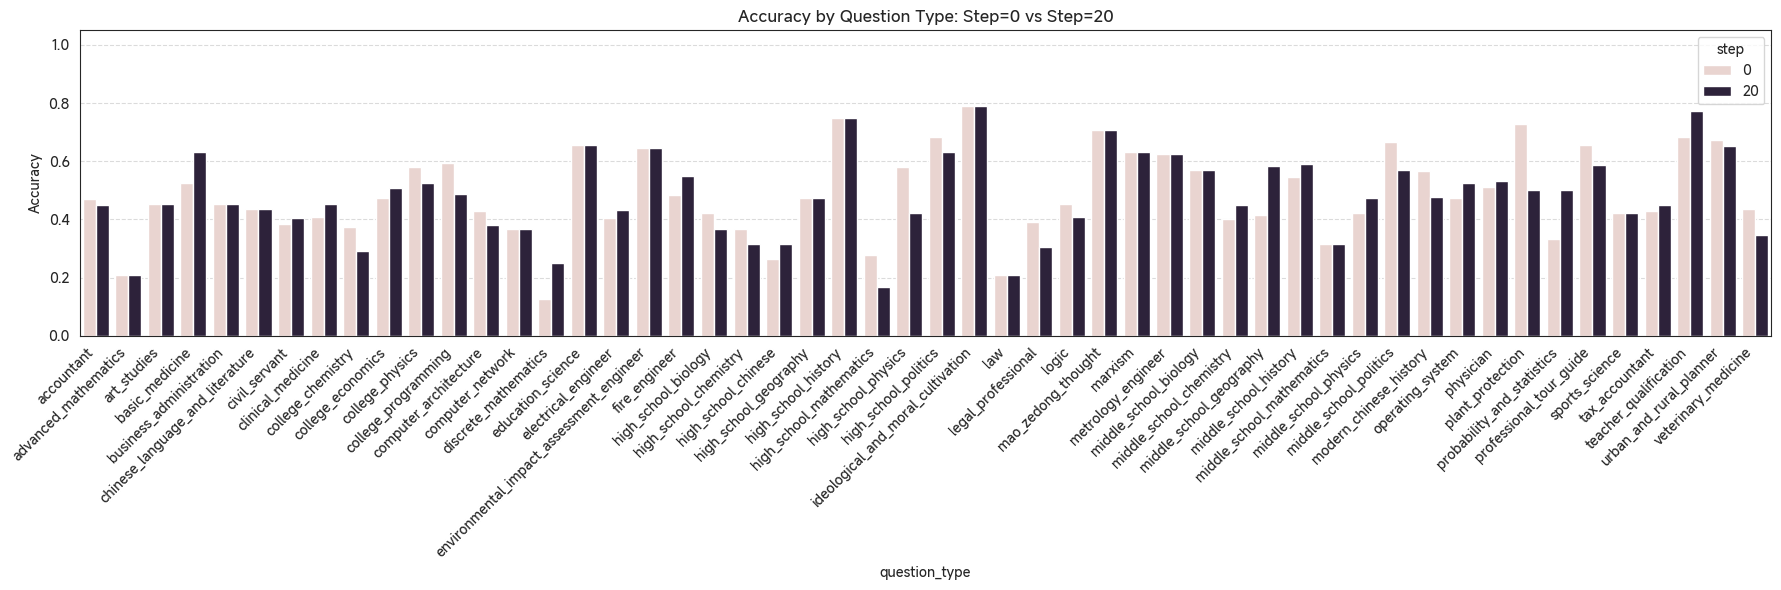

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 读取 Step=0 的数据
df0 = pd.read_csv("./eval_result/answer_step_0.csv")
df0.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]
acc_df0 = df0.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df0["accuracy"] = acc_df0["sum"] / acc_df0["count"]
acc_df0.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df0 = acc_df0.reset_index()
acc_df0["step"] = 0

# 读取 Step=20 的数据
df20 = pd.read_csv("./eval_result/answer_step_20.csv")
df20.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]
acc_df20 = df20.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df20["accuracy"] = acc_df20["sum"] / acc_df20["count"]
acc_df20.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df20 = acc_df20.reset_index()
acc_df20["step"] = 20

# 合并数据用于对比绘图
acc_compare_df = pd.concat([acc_df0[["question_type", "accuracy", "step"]],
                            acc_df20[["question_type", "accuracy", "step"]]])

# 绘制对比柱状图
plt.figure(figsize=(18, 6))
sns.barplot(data=acc_compare_df, x="question_type", y="accuracy", hue="step")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy by Question Type: Step=0 vs Step=20")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


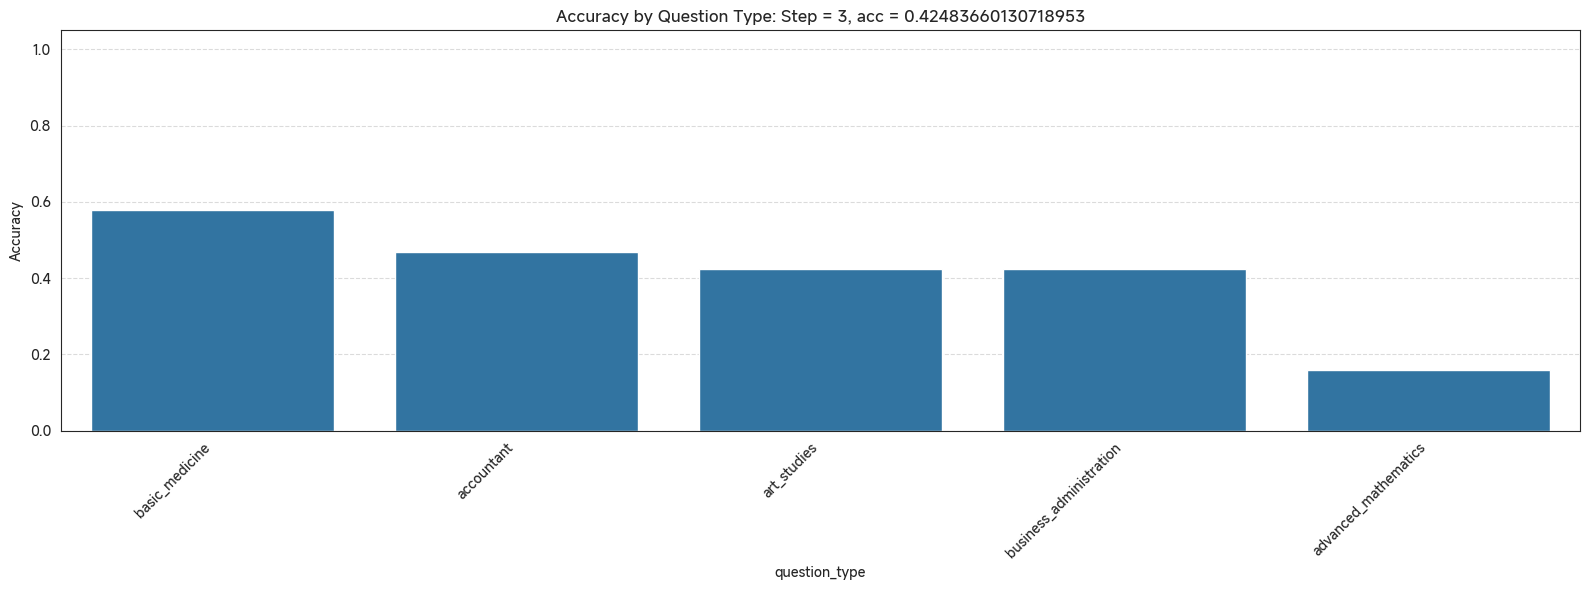

question_type  total_questions  correct_answers  accuracy
0           basic_medicine               19               11  0.578947
1               accountant               49               23  0.469388
2              art_studies               33               14  0.424242
3  business_administration               33               14  0.424242
4     advanced_mathematics               19                3  0.157895

In [68]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_10.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

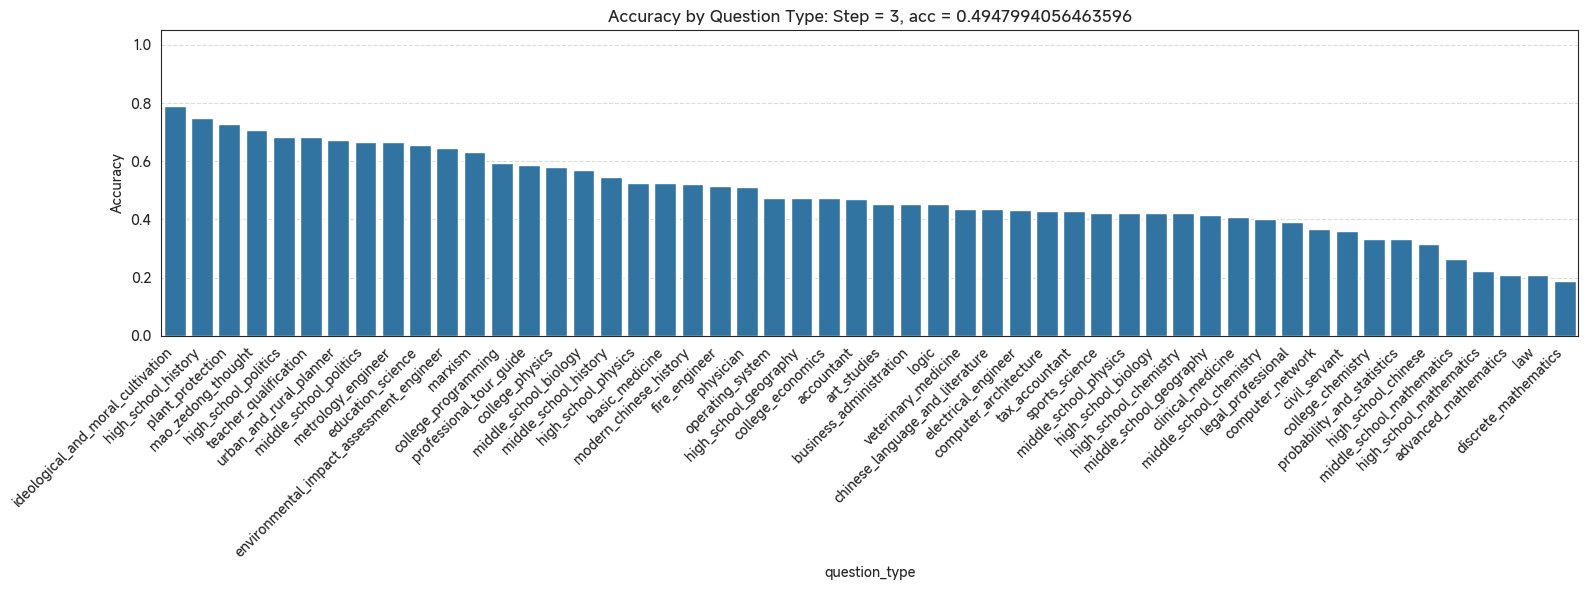

question_type  total_questions  \
0          ideological_and_moral_cultivation               19   
1                        high_school_history               20   
2                           plant_protection               22   
3                         mao_zedong_thought               24   
4                       high_school_politics               19   
5                      teacher_qualification               44   
6                    urban_and_rural_planner               46   
7                     middle_school_politics               21   
8                         metrology_engineer               24   
9                          education_science               29   
10  environmental_impact_assessment_engineer               31   
11                                   marxism               19   
12                       college_programming               37   
13                   professional_tour_guide               29   
14                           college_physics               19   
15                     middle_school_biology               21   
16                     middle_school_history               22   
17                       high_school_physics               19   
18                            basic_medicine               19   
19                    modern_chinese_history               23   
20                             fire_engineer               31   
21                                 physician               49   
22                          operating_system               19   
23                     high_school_geography               19   
24                         college_economics               55   
25                                accountant               49   
26                               art_studies               33   
27                   business_administration               33   
28                                     logic               22   
29                       veterinary_medicine               23   
30           chinese_language_and_literature               23   
31                       electrical_engineer               37   
32                     computer_architecture               21   
33                            tax_accountant               49   
34                            sports_science               19   
35                     middle_school_physics               19   
36                       high_school_biology               19   
37                     high_school_chemistry               19   
38                   middle_school_geography               12   
39                         clinical_medicine               22   
40                   middle_school_chemistry               20   
41                        legal_professional               23   
42                          computer_network               19   
43                             civil_servant               47   
44                         college_chemistry               24   
45                probability_and_statistics               18   
46                       high_school_chinese               19   
47                 middle_school_mathematics               19   
48                   high_school_mathematics               18   
49                      advanced_mathematics               19   
50                                       law               24   
51                      discrete_mathematics               16   

    correct_answers  accuracy  
0                15  0.789474  
1                15  0.750000  
2                16  0.727273  
3                17  0.708333  
4                13  0.684211  
5                30  0.681818  
6                31  0.673913  
7                14  0.666667  
8                16  0.666667  
9                19  0.655172  
10               20  0.645161  
11               12  0.631579  
12               22  0.594595  
13               17  0.586207  
14               11  0.578947  
15               12  0.571429  
16               12  0.545455  
17       

In [65]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_3.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

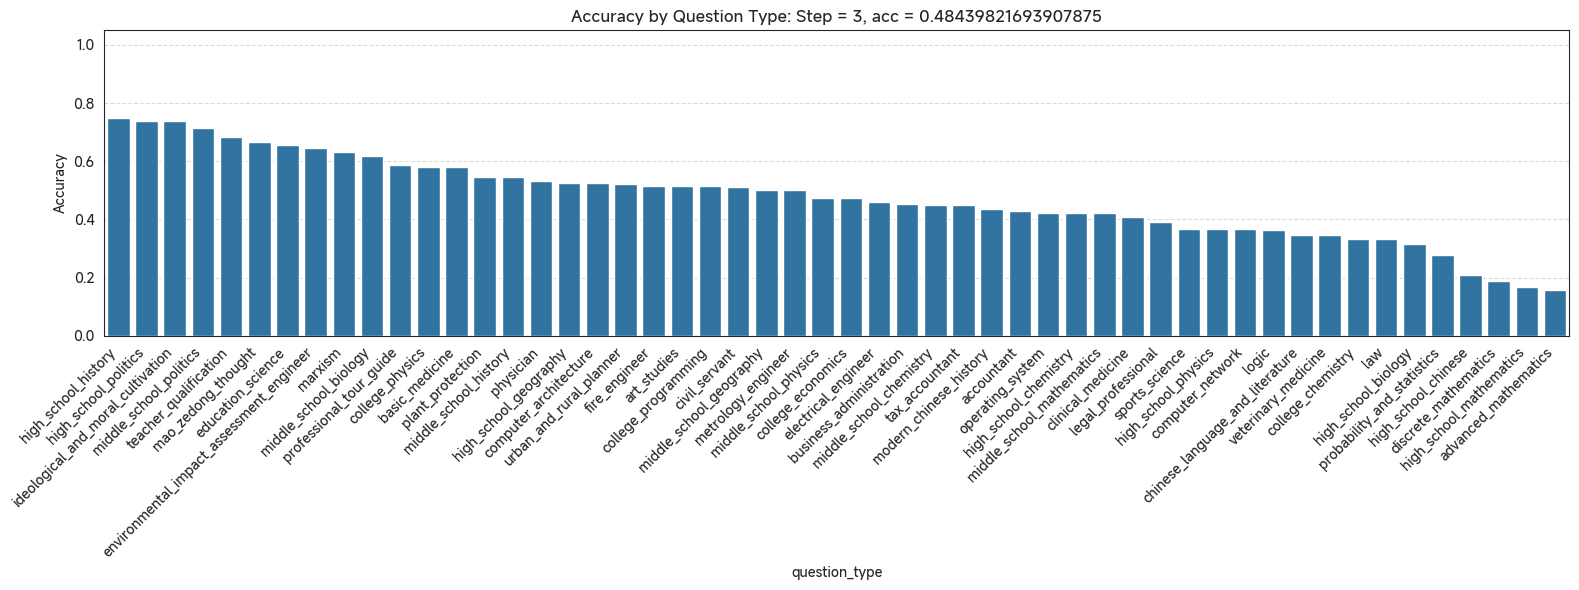

question_type  total_questions  \
0                        high_school_history               20   
1                       high_school_politics               19   
2          ideological_and_moral_cultivation               19   
3                     middle_school_politics               21   
4                      teacher_qualification               44   
5                         mao_zedong_thought               24   
6                          education_science               29   
7   environmental_impact_assessment_engineer               31   
8                                    marxism               19   
9                      middle_school_biology               21   
10                   professional_tour_guide               29   
11                           college_physics               19   
12                            basic_medicine               19   
13                          plant_protection               22   
14                     middle_school_history               22   
15                                 physician               49   
16                     high_school_geography               19   
17                     computer_architecture               21   
18                   urban_and_rural_planner               46   
19                             fire_engineer               31   
20                               art_studies               33   
21                       college_programming               37   
22                             civil_servant               47   
23                   middle_school_geography               12   
24                        metrology_engineer               24   
25                     middle_school_physics               19   
26                         college_economics               55   
27                       electrical_engineer               37   
28                   business_administration               33   
29                   middle_school_chemistry               20   
30                            tax_accountant               49   
31                    modern_chinese_history               23   
32                                accountant               49   
33                          operating_system               19   
34                     high_school_chemistry               19   
35                 middle_school_mathematics               19   
36                         clinical_medicine               22   
37                        legal_professional               23   
38                            sports_science               19   
39                       high_school_physics               19   
40                          computer_network               19   
41                                     logic               22   
42           chinese_language_and_literature               23   
43                       veterinary_medicine               23   
44                         college_chemistry               24   
45                                       law               24   
46                       high_school_biology               19   
47                probability_and_statistics               18   
48                       high_school_chinese               19   
49                      discrete_mathematics               16   
50                   high_school_mathematics               18   
51                      advanced_mathematics               19   

    correct_answers  accuracy  
0                15  0.750000  
1                14  0.736842  
2                14  0.736842  
3                15  0.714286  
4                30  0.681818  
5                16  0.666667  
6                19  0.655172  
7                20  0.645161  
8                12  0.631579  
9                13  0.619048  
10               17  0.586207  
11               11  0.578947  
12               11  0.578947  
13               12  0.545455  
14               12  0.545455  
15               26  0.530612  
16               10  0.526316  
17       

In [61]:
# 读取数据
df = pd.read_csv("./eval_result2/answer_step_3.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

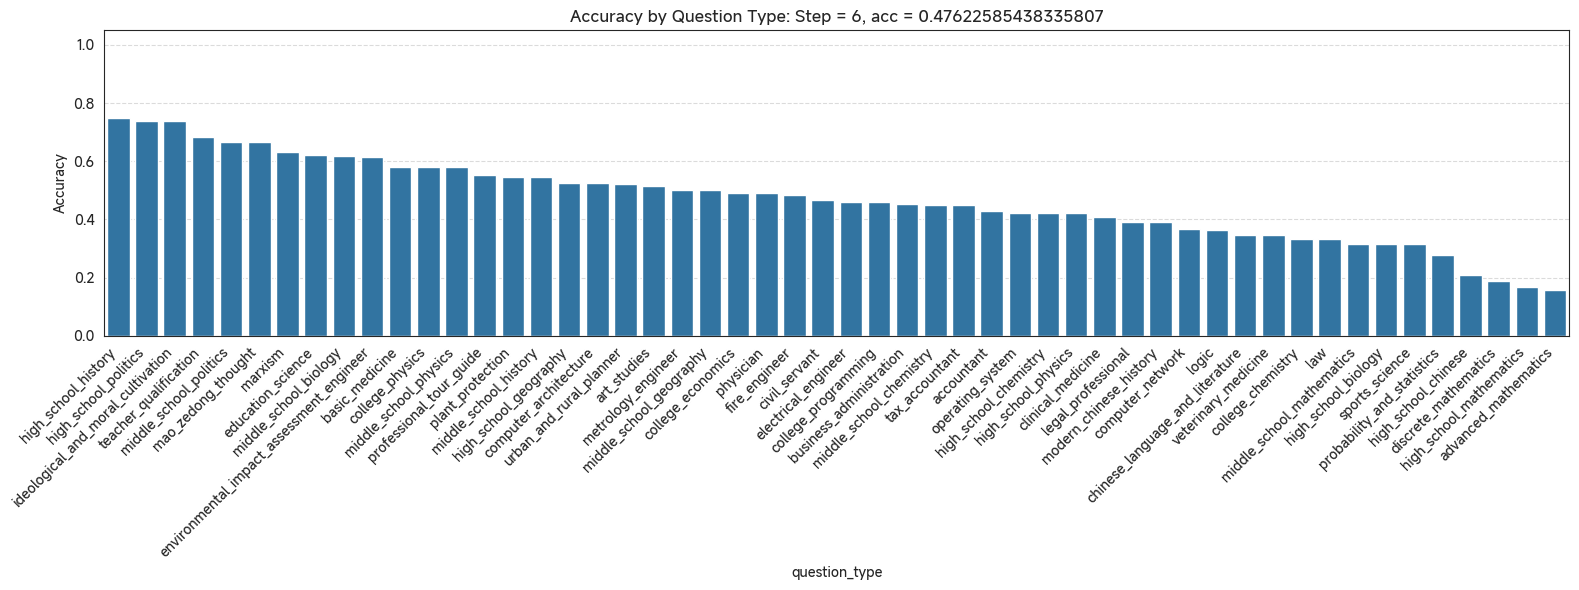

In [44]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_6.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 6, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

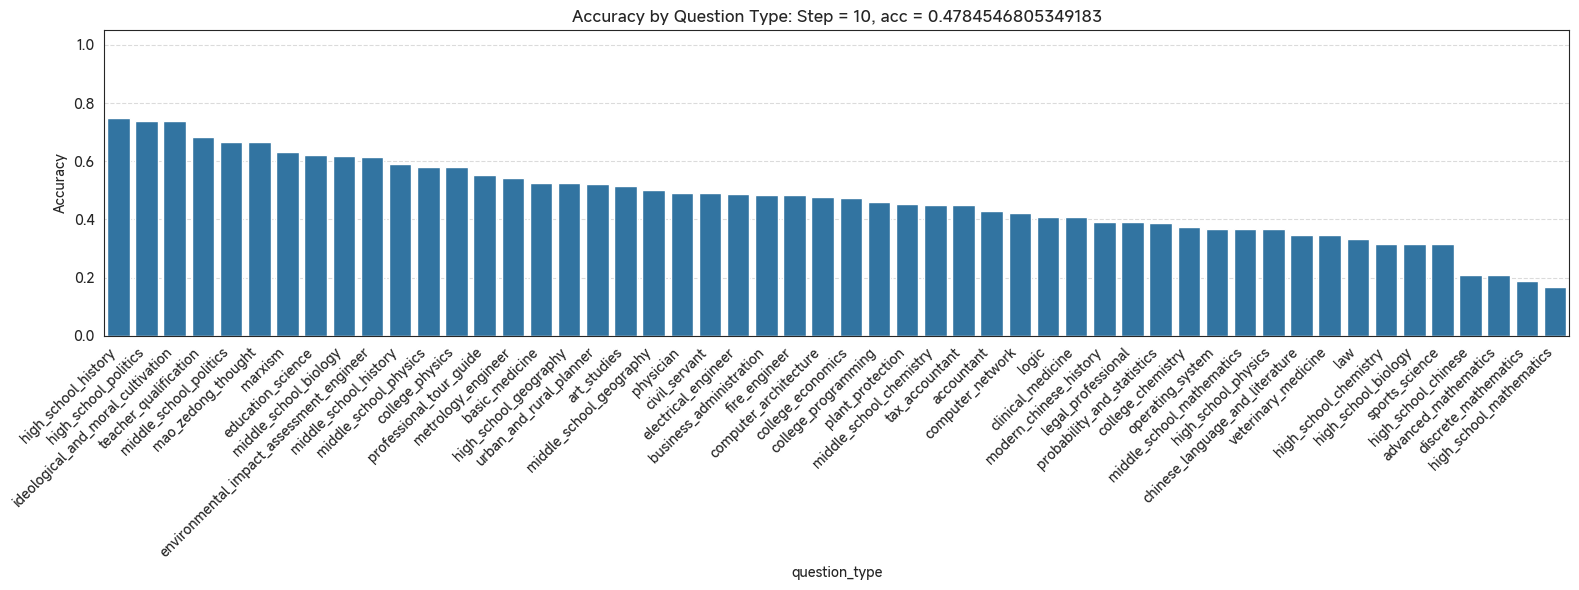

In [45]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_10.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 10, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

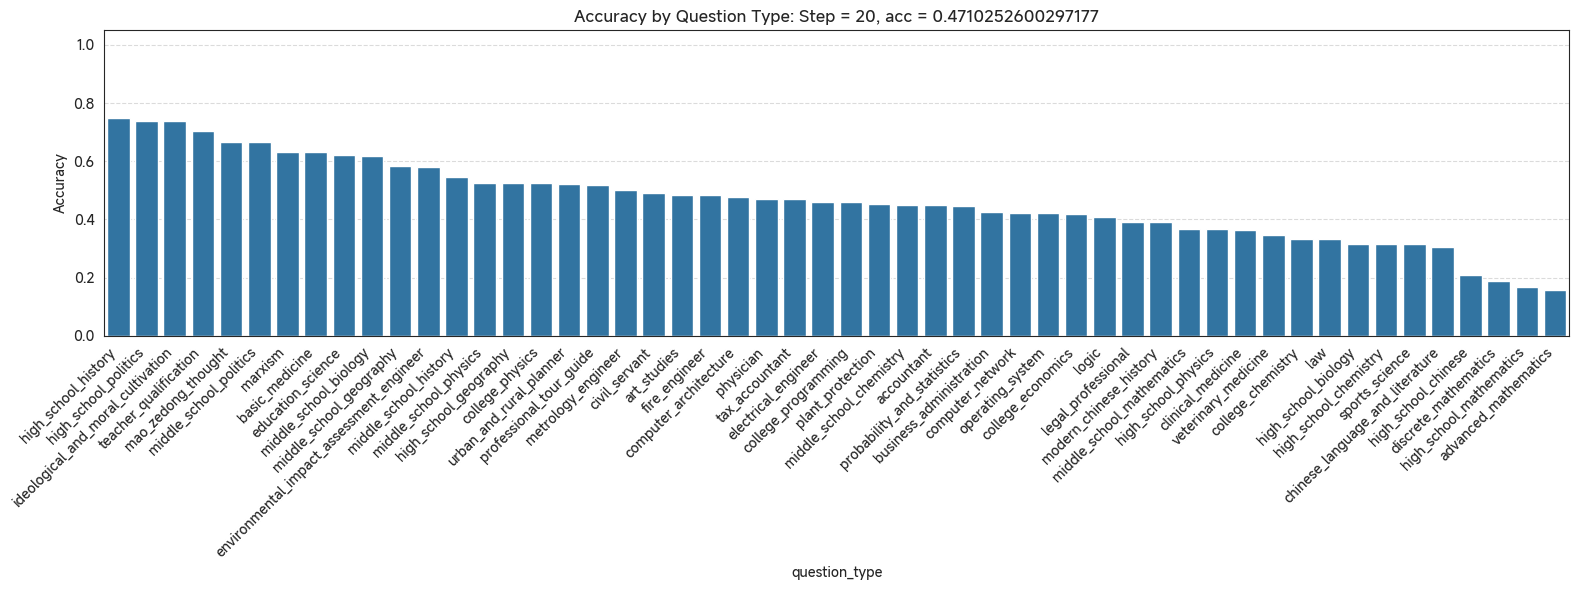

In [46]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

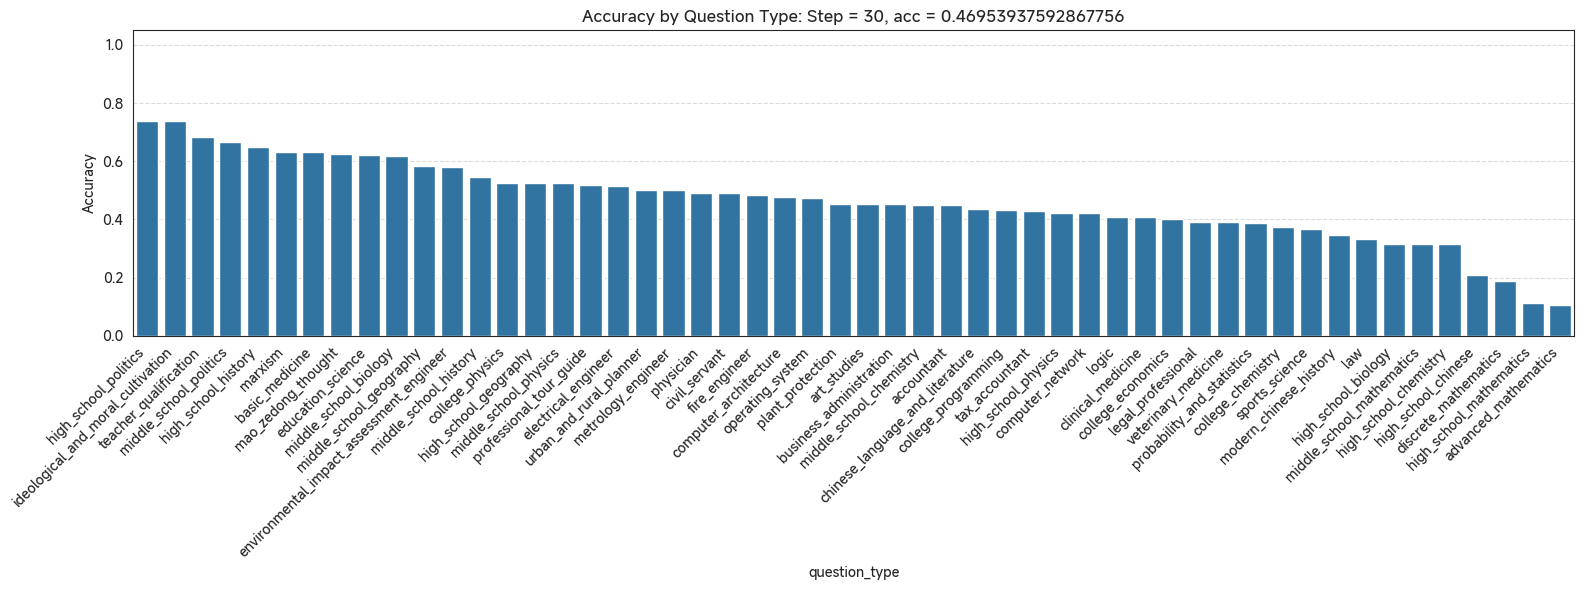

In [51]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_30.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 30, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

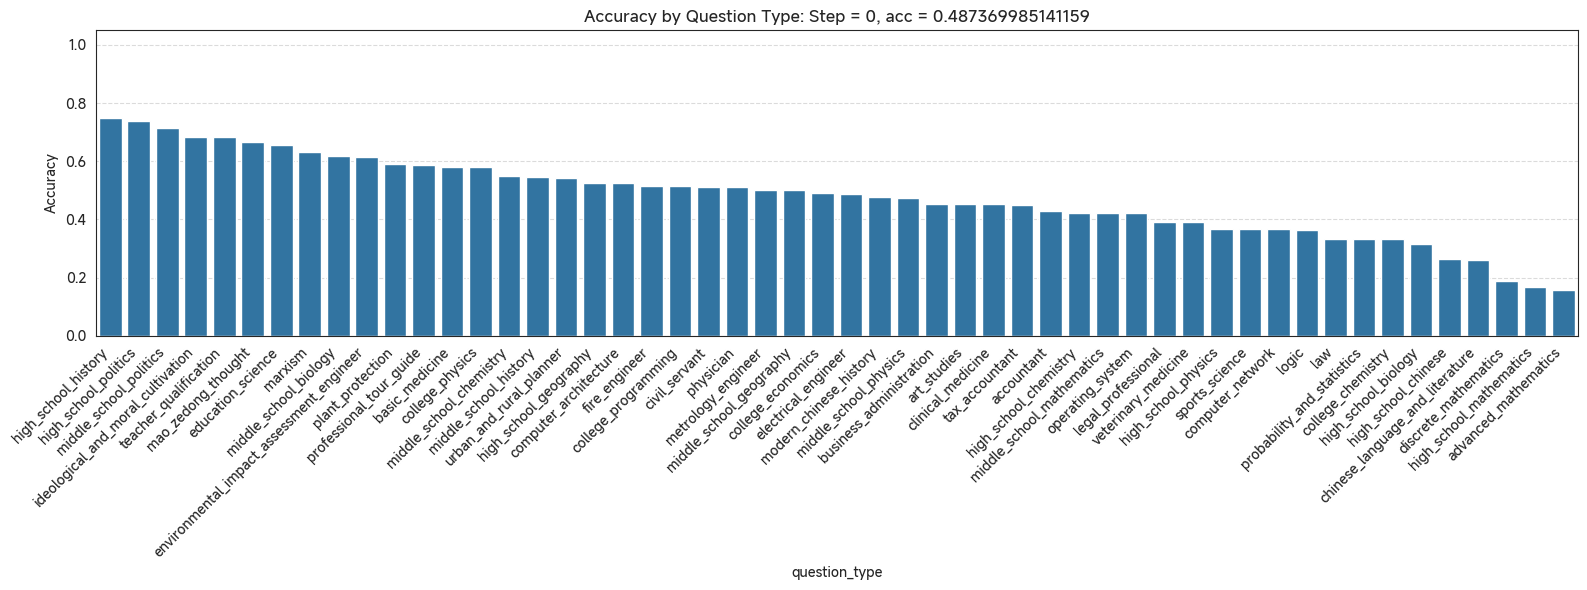

In [55]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_0.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 0, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
acc_df

question_type  total_questions  \
0                        high_school_history               20   
1                       high_school_politics               19   
2          ideological_and_moral_cultivation               19   
3                      teacher_qualification               44   
4                     middle_school_politics               21   
5                         mao_zedong_thought               24   
6                                    marxism               19   
7                          education_science               29   
8                      middle_school_biology               21   
9   environmental_impact_assessment_engineer               31   
10                            basic_medicine               19   
11                           college_physics               19   
12                     middle_school_physics               19   
13                   professional_tour_guide               29   
14                          plant_protection               22   
15                     middle_school_history               22   
16                     high_school_geography               19   
17                     computer_architecture               21   
18                   urban_and_rural_planner               46   
19                               art_studies               33   
20                        metrology_engineer               24   
21                   middle_school_geography               12   
22                         college_economics               55   
23                                 physician               49   
24                             fire_engineer               31   
25                             civil_servant               47   
26                       electrical_engineer               37   
27                       college_programming               37   
28                   business_administration               33   
29                   middle_school_chemistry               20   
30                            tax_accountant               49   
31                                accountant               49   
32                          operating_system               19   
33                     high_school_chemistry               19   
34                       high_school_physics               19   
35                         clinical_medicine               22   
36                        legal_professional               23   
37                    modern_chinese_history               23   
38                          computer_network               19   
39                                     logic               22   
40           chinese_language_and_literature               23   
41                       veterinary_medicine               23   
42                         college_chemistry               24   
43                                       law               24   
44                 middle_school_mathematics               19   
45                       high_school_biology               19   
46                            sports_science               19   
47                probability_and_statistics               18   
48                       high_school_chinese               19   
49                      discrete_mathematics               16   
50                   high_school_mathematics               18   
51                      advanced_mathematics               19   

    correct_answers  accuracy  
0                15  0.750000  
1                14  0.736842  
2                14  0.736842  
3                30  0.681818  
4                14  0.666667  
5                16  0.666667  
6                12  0.631579  
7                18  0.620690  
8                13  0.619048  
9                19  0.612903  
10               11  0.578947  
11               11  0.578947  
12               11  0.578947  
13               16  0.551724  
14               12  0.545455  
15               12  0.545455  
16               10  0.526316  
17       

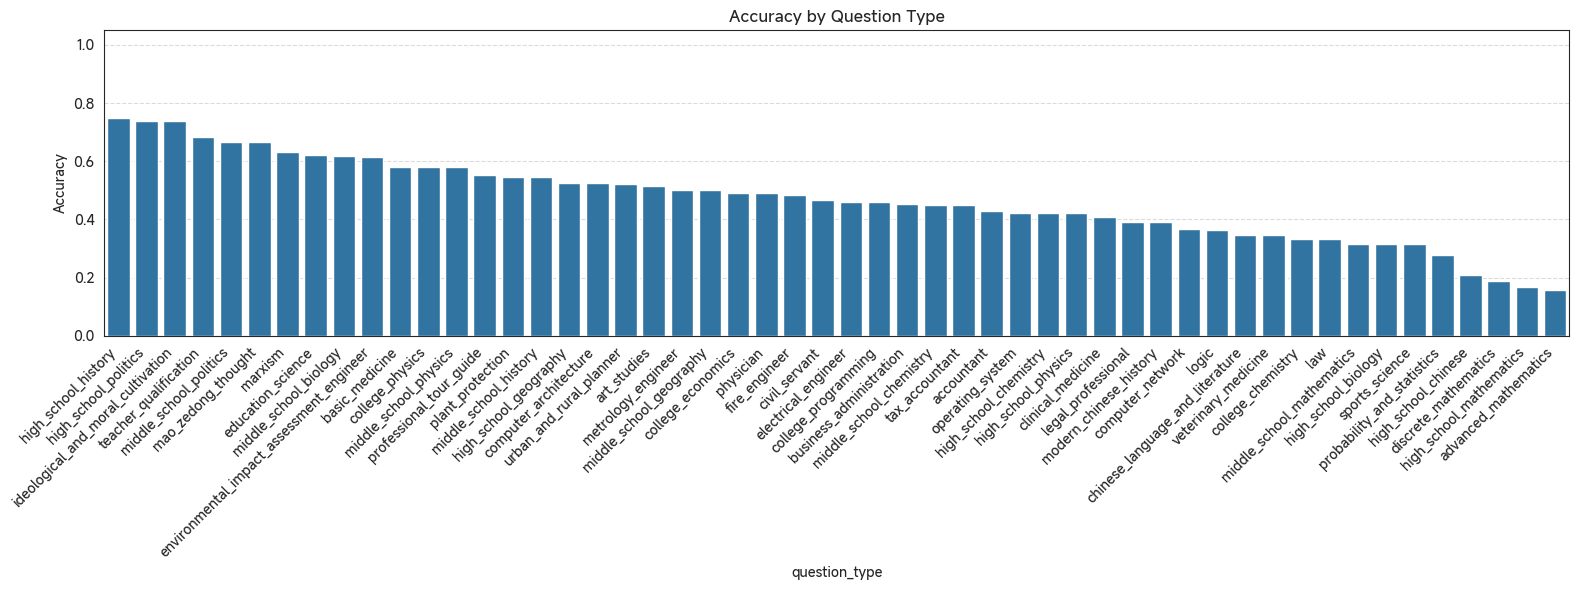

In [49]:
# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy by Question Type")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
# 按 question_type 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]

# 重命名列更直观
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]

# 显示结果
print(acc_df)

                                          total_questions  correct_answers  \
question_type                                                                
accountant                                             49               21   
advanced_mathematics                                   19                3   
art_studies                                            33               17   
basic_medicine                                         19               11   
business_administration                                33               15   
chinese_language_and_literature                        23                8   
civil_servant                                          47               22   
clinical_medicine                                      22                9   
college_chemistry                                      24                8   
college_economics                                      55               27   
college_physics                                        19       